# Visualization - matplotlib

## Graphs

* Line chart
* Bar chart
* Scatter plot
* Bubble plot
* Area plot and stacked plot
* Pie chart
* Circle chart
* Table chart
* Treemap chart
* The Sankey class
* Polar chart
* Histogram
* Lollipot chart
* Heatmap chart


### Import libraries

* datetime
* math
* pandas
* random
* radar
* faker
* matplotlib
* calendar
* numpy
* seaborn
* squarify
* scipy

In [2]:
!pip install --upgrade pip

!pip install radar faker seaborn matplotlib pandas numpy squarify scipy quandl 

In [3]:
import random
import radar
from faker import Faker
import calendar 
import datetime
import math

import numpy as np
import pandas as pd
import scipy
import pylab


import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
from matplotlib.patches import Circle

import seaborn as sns
import squarify
import  quandl 


### Line chart

#### Function generate fake data


In [4]:
fake = Faker()
  
def generateData(n:int,start:datetime,end:datetime):
    listdata = []
    str_start = start.strftime('%Y-%m-%d')
    str_end = end.strftime('%Y-%m-%d')
    delta = end - start
    for _ in range(n):
        date = radar.random_datetime(start=str_start, stop=str_end).strftime("%Y-%m-%d")
        price = round(random.uniform(900, 1000), 4)
        listdata.append([date, price])
    
    # Create dataframe from listdata add columns date and price
    df = pd.DataFrame(listdata, columns = ['Date', 'Price'])
    # Convert date in type datetime
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df = df.groupby(by='Date').mean()

    return df

### Generate data 

In [5]:
start = datetime.datetime(2019, 8, 1)
end = datetime.datetime(2019, 8, 30)

df = generateData(50,start,end)
df.head(10)

,Price
Date,
2019-08-01,927.320367
2019-08-02,930.418400
2019-08-03,949.434550
2019-08-04,953.814200
2019-08-05,967.058250
2019-08-07,959.472900
2019-08-08,970.457300
2019-08-09,949.144900
2019-08-11,930.655500


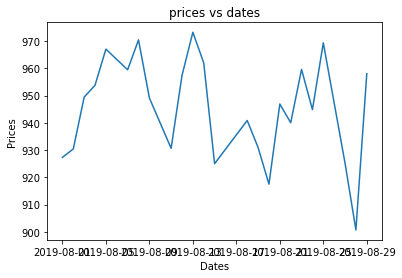

In [6]:
# Define title and size
plt.rcParams['figure.figsize'] = (40, 30)
plt.plot(df)
plt.title('prices vs dates')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.show()


#### Semilogarithm Graph

/tmp/ipykernel_12702/4243627259.py:9: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_xlim([0, 10]);


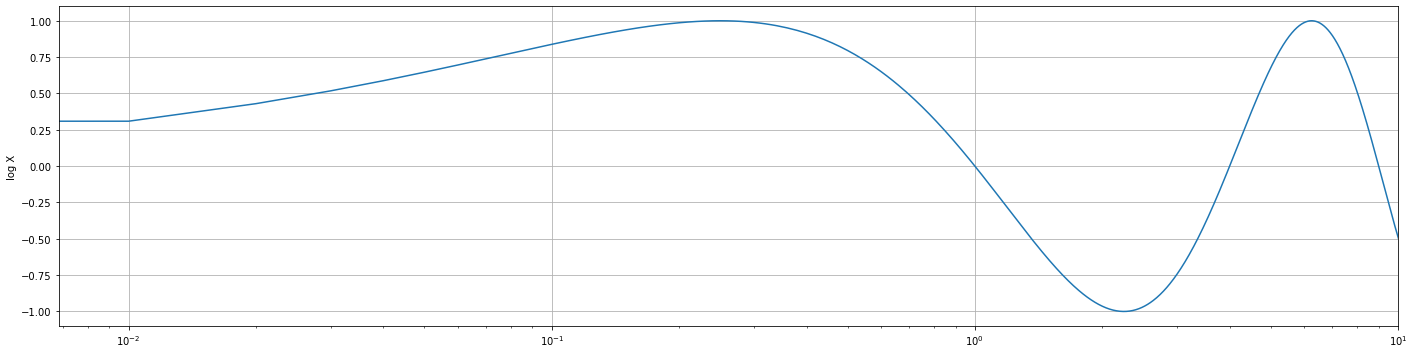

In [7]:
plt.rcParams['font.size'] = 10.
plt.rcParams['figure.figsize'] = (24, 20)

x = np.arange(0., 20, 0.01)
fig = plt.figure()
ax2 = fig.add_subplot(311)
y2 = np.sin(np.pi*(x**(1.0/2.0)))
ax2.semilogx(x, y2);
ax2.set_xlim([0, 10]);
ax2.grid(True)
ax2.set_ylabel('log X')
plt.show()

#### Polar coordinates

r = 2 cosine(pi*t)   0<t <2

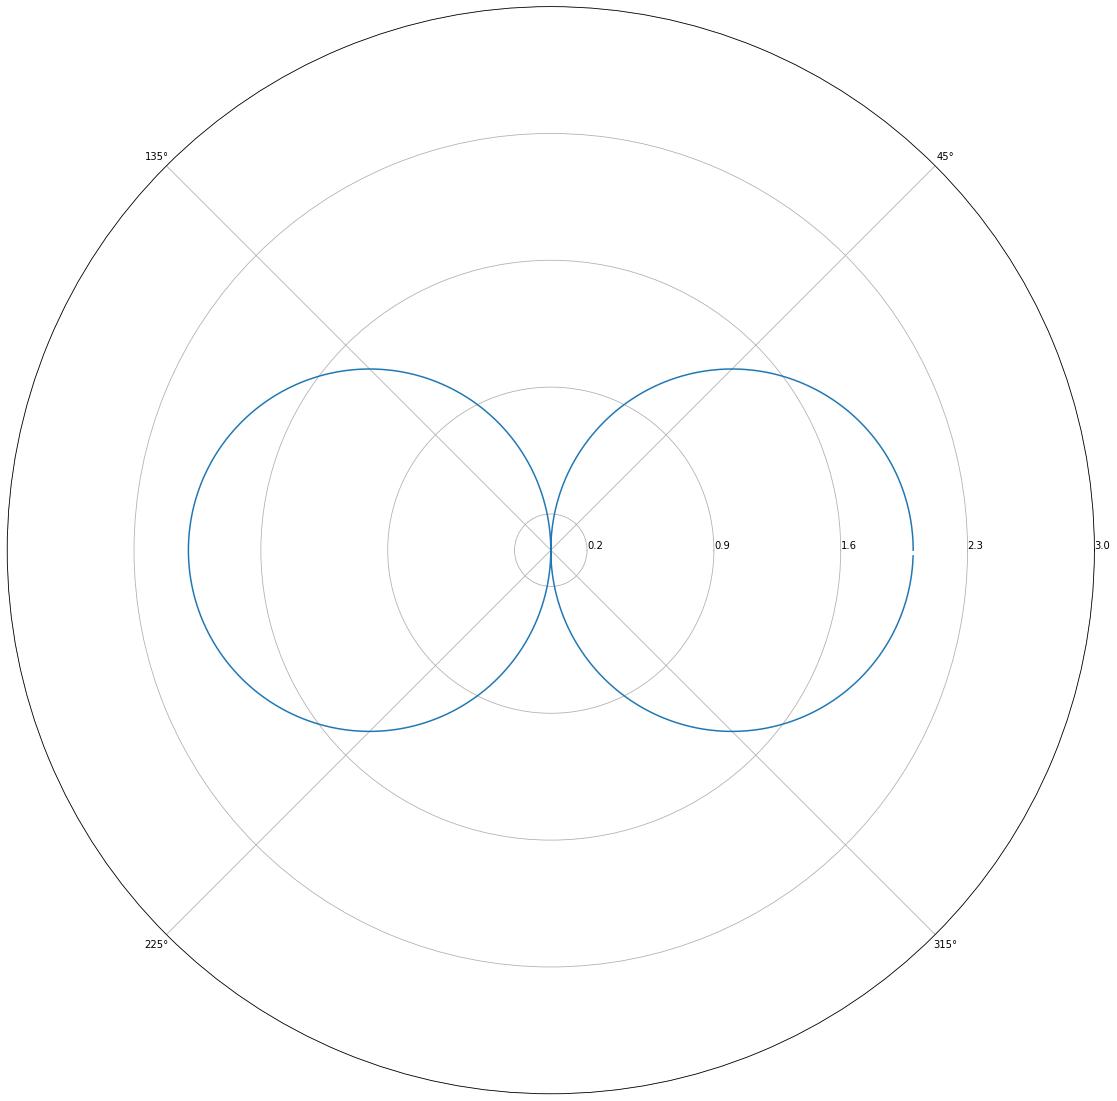

In [8]:
theta = np.arange(0., 2., 0.005)*np.pi

r = 2*np.abs(np.cos(theta))

plt.polar(theta, r)
plt.thetagrids(range(45, 360, 90))
plt.rgrids(np.arange(0.2, 3.1, .7), angle=0);
plt.show()

#### Electric field

In [9]:
def E(q, r0, x, y):
    
    """ Return E=(Ex,Ey)  charge q inn r0"""

    den = np.hypot(x-r0[0], y-r0[1])**3

    return q * (x - r0[0]) / den, q * (y - r0[1]) / den

In [10]:
nx, ny = 64, 64

x = np.linspace(-2, 2, nx)

y = np.linspace(-2, 2, ny)

X, Y = np.meshgrid(x, y)

In [11]:
count = 1

nq = 2**int(count)

charges = [(i%2 * 2 - 1, (np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq))) for i in range(nq)]
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))

for charge in charges:

    ex, ey = E(*charge, x=X, y=Y)

    Ex += ex

    Ey += ey

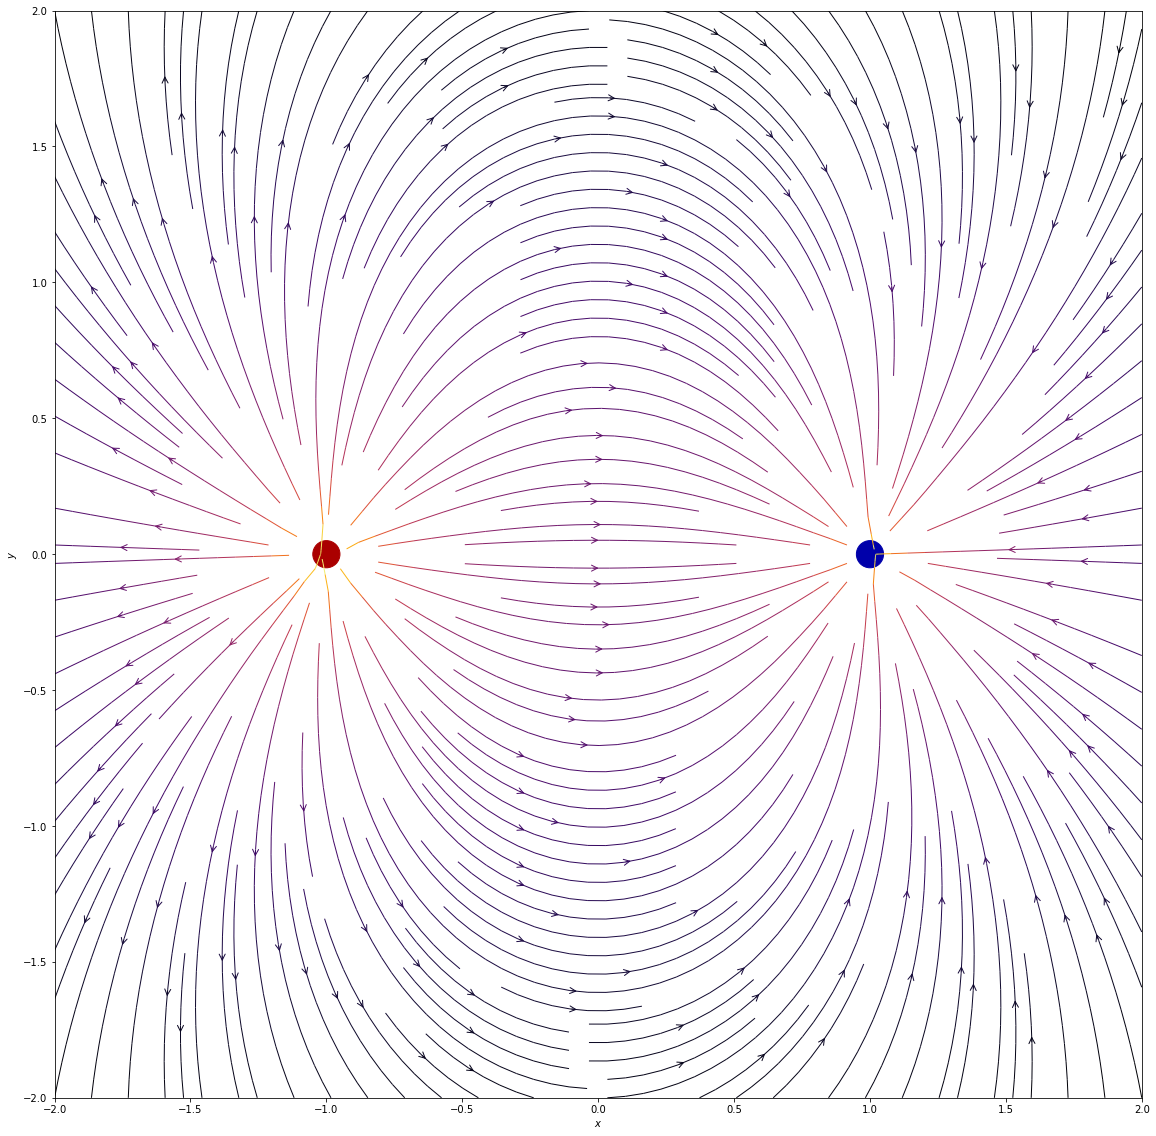

In [12]:
fig = plt.figure()

ax = fig.add_subplot(111)


color = 2 * np.log(np.hypot(Ex, Ey))

ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,

              density=2, arrowstyle='->', arrowsize=1.5)



charge_colors = {True: '#aa0000', False: '#0000aa'}

for q, pos in charges:

    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0]))




ax.set_xlabel('$x$')

ax.set_ylabel('$y$')

ax.set_xlim(-2,2)

ax.set_ylim(-2,2)

ax.set_aspect('equal')

plt.show()

#### Time series

In [13]:
start = pd.to_datetime("2012-01-01")
end = pd.to_datetime("2018-03-27")
delta = quandl.get("WIKI/DAL",start_date=start,end_date=end)
jb = quandl.get("WIKI/JBLU",start_date=start,end_date=end)
sw =  quandl.get("WIKI/LUV",start_date=start,end_date=end)

In [14]:
delta.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-01-03,8.23,8.30,8.02,8.04,7093200.0,0.0,1.0,7.799097,7.865431,7.600092,7.619044,7093200.0
2012-01-04,8.03,8.14,7.83,8.01,7412900.0,0.0,1.0,7.609568,7.713809,7.420040,7.590615,7412900.0
2012-01-05,8.03,8.35,7.87,8.33,10509800.0,0.0,1.0,7.609568,7.912814,7.457945,7.893861,10509800.0
2012-01-06,8.26,8.43,8.24,8.32,6683300.0,0.0,1.0,7.827526,7.988625,7.808573,7.884384,6683300.0
2012-01-09,8.34,8.50,8.26,8.28,9015700.0,0.0,1.0,7.903337,8.054960,7.827526,7.846479,9015700.0


In [15]:
jb.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-01-03,5.33,5.400,5.05,5.12,4520200.0,0.0,1.0,5.33,5.400,5.05,5.12,4520200.0
2012-01-04,5.13,5.240,5.04,5.23,3648000.0,0.0,1.0,5.13,5.240,5.04,5.23,3648000.0
2012-01-05,5.19,5.420,5.05,5.42,6118900.0,0.0,1.0,5.19,5.420,5.05,5.42,6118900.0
2012-01-06,5.40,5.480,5.31,5.45,4447900.0,0.0,1.0,5.40,5.480,5.31,5.45,4447900.0
2012-01-09,5.46,5.545,5.43,5.53,8325400.0,0.0,1.0,5.46,5.545,5.43,5.53,8325400.0


In [16]:
sw.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-01-03,8.72,8.76,8.41,8.41,8808600.0,0.0,1.0,8.361841,8.400198,8.064574,8.064574,8808600.0
2012-01-04,8.41,8.61,8.22,8.60,7582700.0,0.0,1.0,8.064574,8.256359,7.882378,8.246770,7582700.0
2012-01-05,8.57,8.64,8.39,8.62,4892200.0,0.0,1.0,8.218002,8.285127,8.045395,8.265948,4892200.0
2012-01-06,8.63,8.70,8.52,8.52,3046800.0,0.0,1.0,8.275538,8.342662,8.170056,8.170056,3046800.0
2012-01-09,8.52,8.68,8.52,8.59,2906900.0,0.0,1.0,8.170056,8.323484,8.170056,8.237181,2906900.0


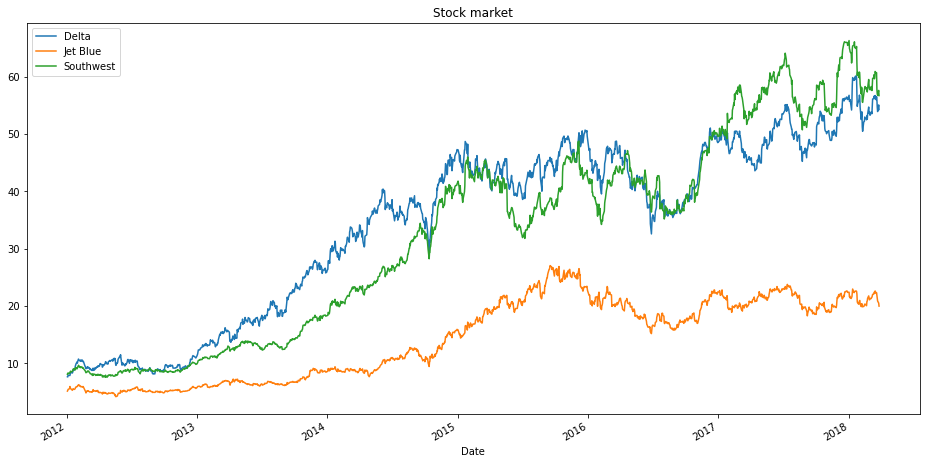

In [17]:
delta["Adj. Close"].plot(label="Delta",figsize=(16,8),title="Precio de cierre ajustado")
jb["Adj. Close"].plot(label="Jet Blue")
sw["Adj. Close"].plot(label="Southwest")
plt.title("Stock market")
plt.legend();
plt.show()

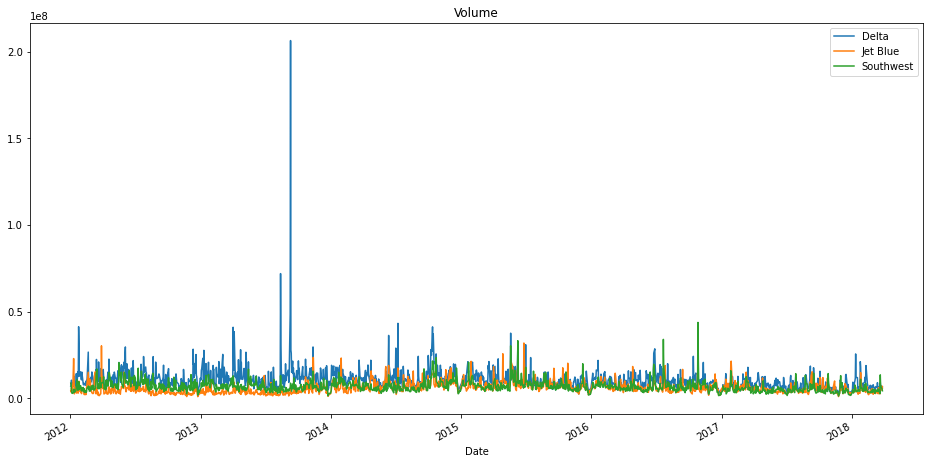

In [18]:
delta["Volume"].plot(label="Delta",figsize=(16,8),title="Volumen de transacciones")
jb["Volume"].plot(label="Jet Blue")
sw["Volume"].plot(label="Southwest")
plt.title("Volume")
plt.legend();
plt.show()

Rolling 50 and 200 days

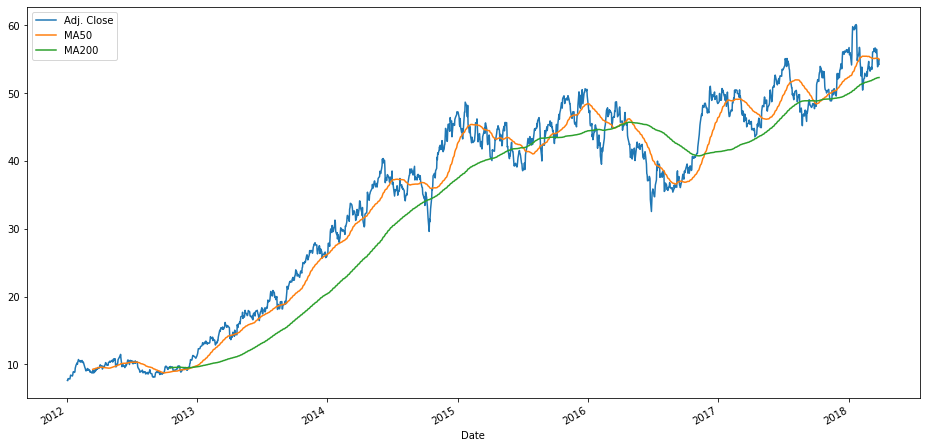

In [19]:
delta["MA50"] = delta["Adj. Close"].rolling(50).mean()
delta["MA200"] = delta["Adj. Close"].rolling(200).mean()
delta[["Adj. Close",'MA50','MA200']].plot(label="DAL",figsize=(16,8));

#### Graph Sin

In [20]:
x=np.linspace(0,10,30)
y=np.sin(x)

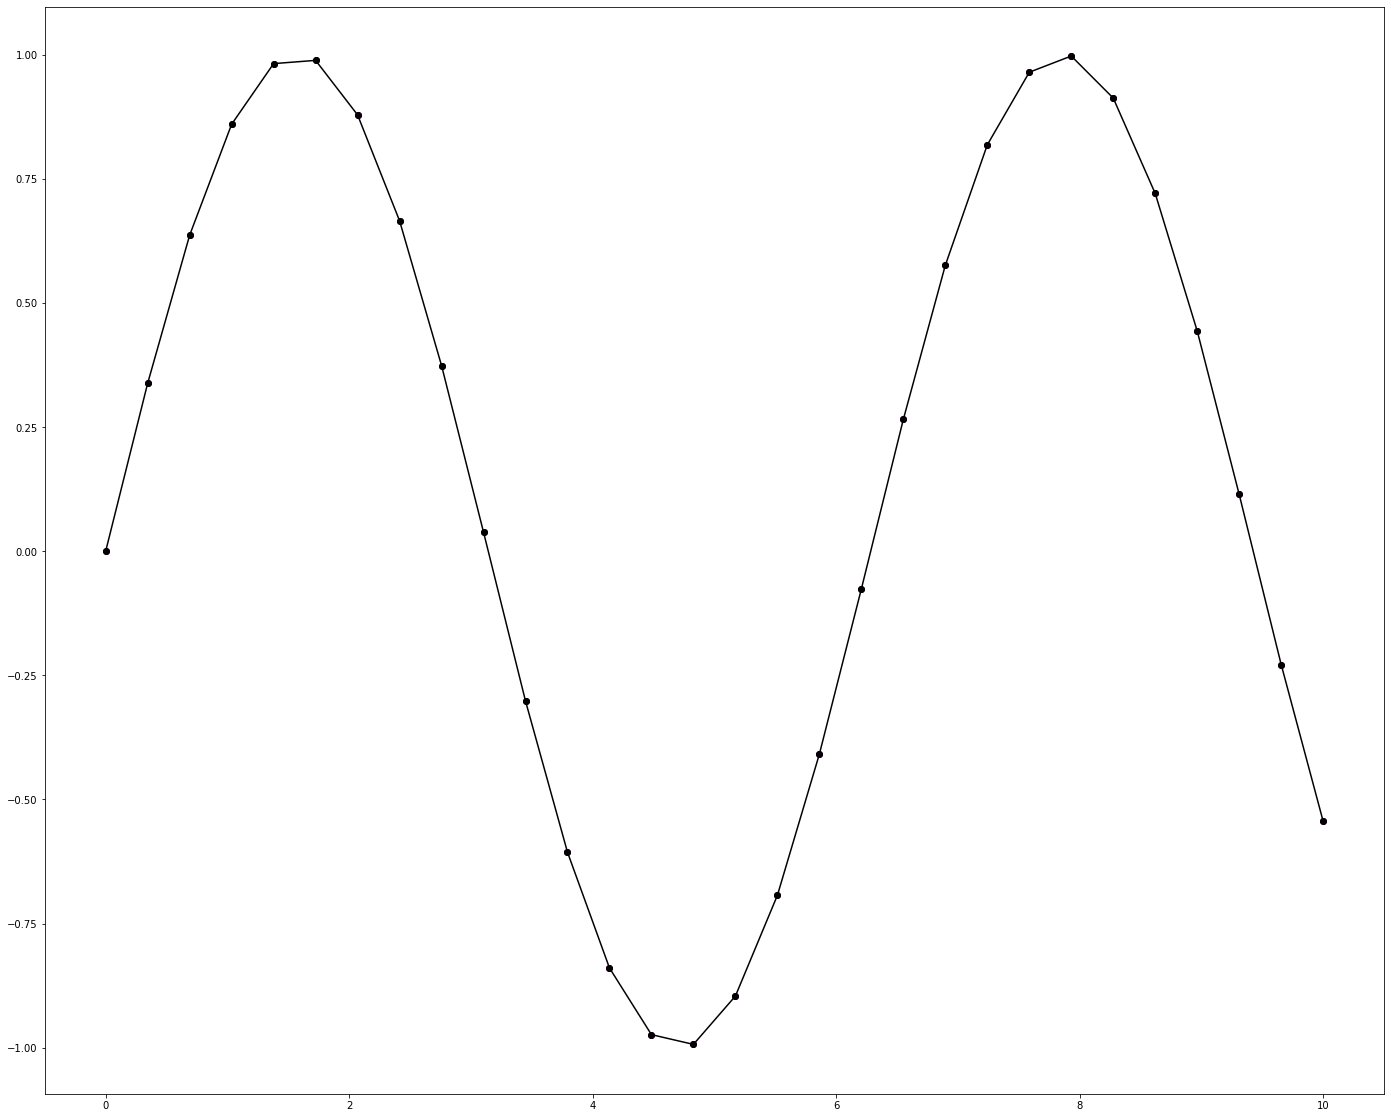

In [21]:
plt.plot(x,y,'o',color='purple')
plt.plot(x,y,'-ok')
plt.show()

### Bar chart

In [22]:
# Setup data 12 months

months = list(range(1, 13))
sold_quantity = [round(random.uniform(100, 200)) for x in range(1, 13)]


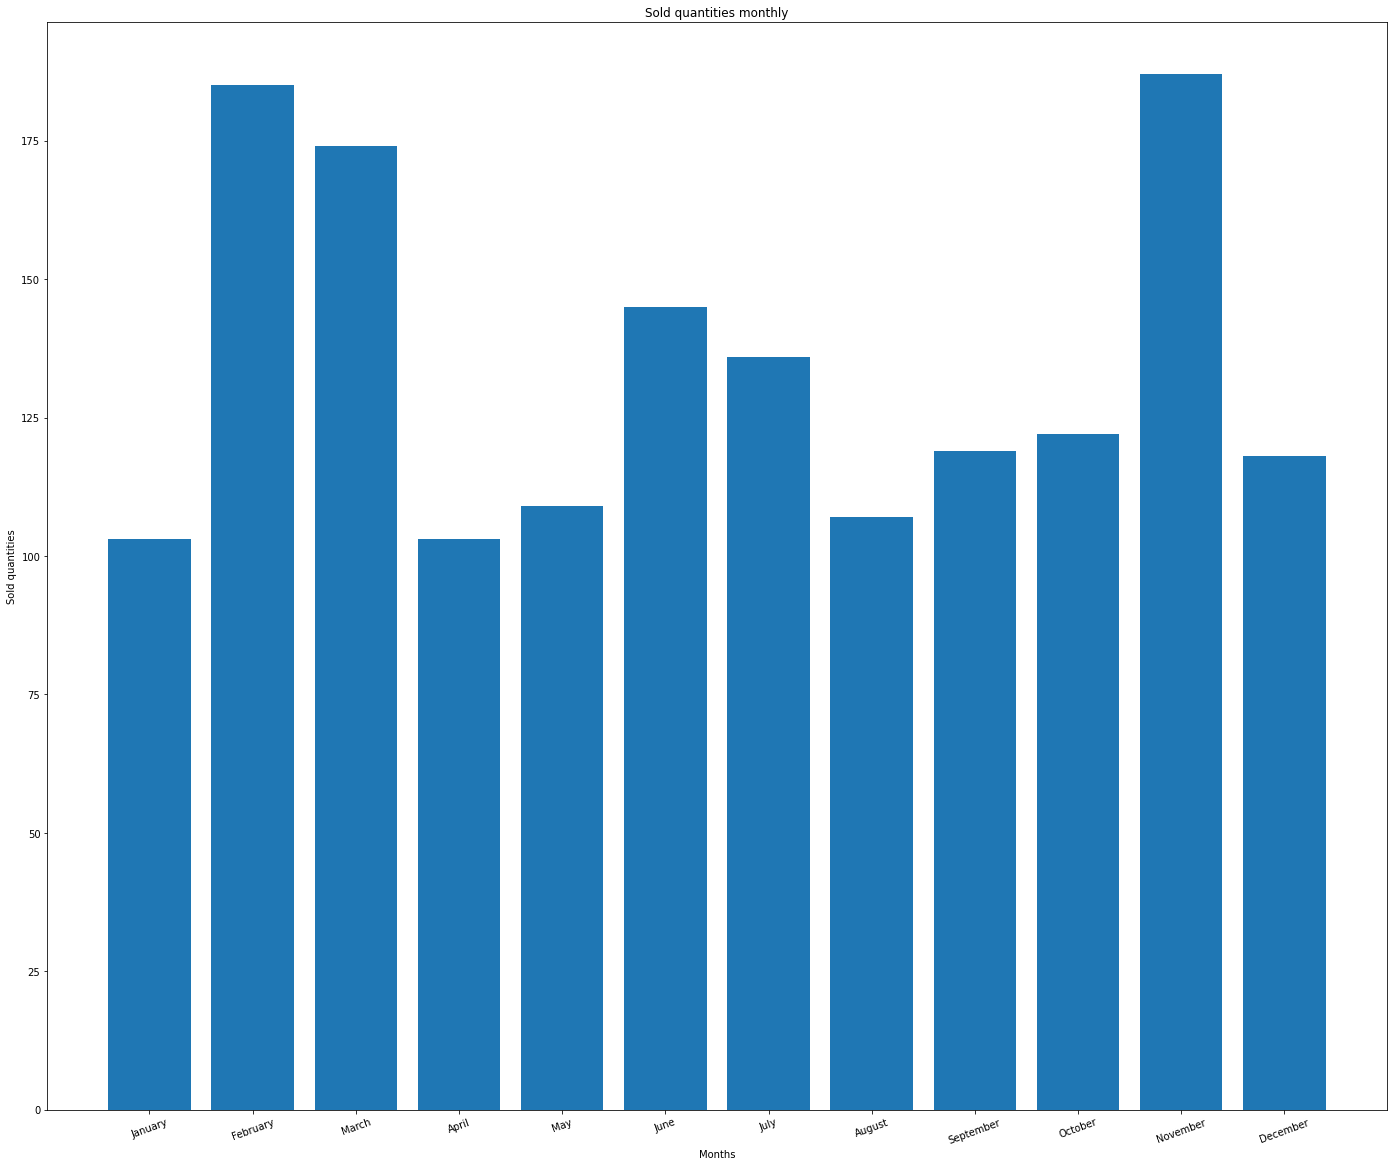

In [23]:
# define subplots
figure, axis = plt.subplots()

# Define x axis 
plt.xticks(months, calendar.month_name[1:13], rotation=20)

# plot graph
plot = axis.bar(months, sold_quantity)
plt.title('Sold quantities monthly')
plt.xlabel('Months')
plt.ylabel('Sold quantities')

# Display graph on the screen. 
plt.show()

Add values on each bar

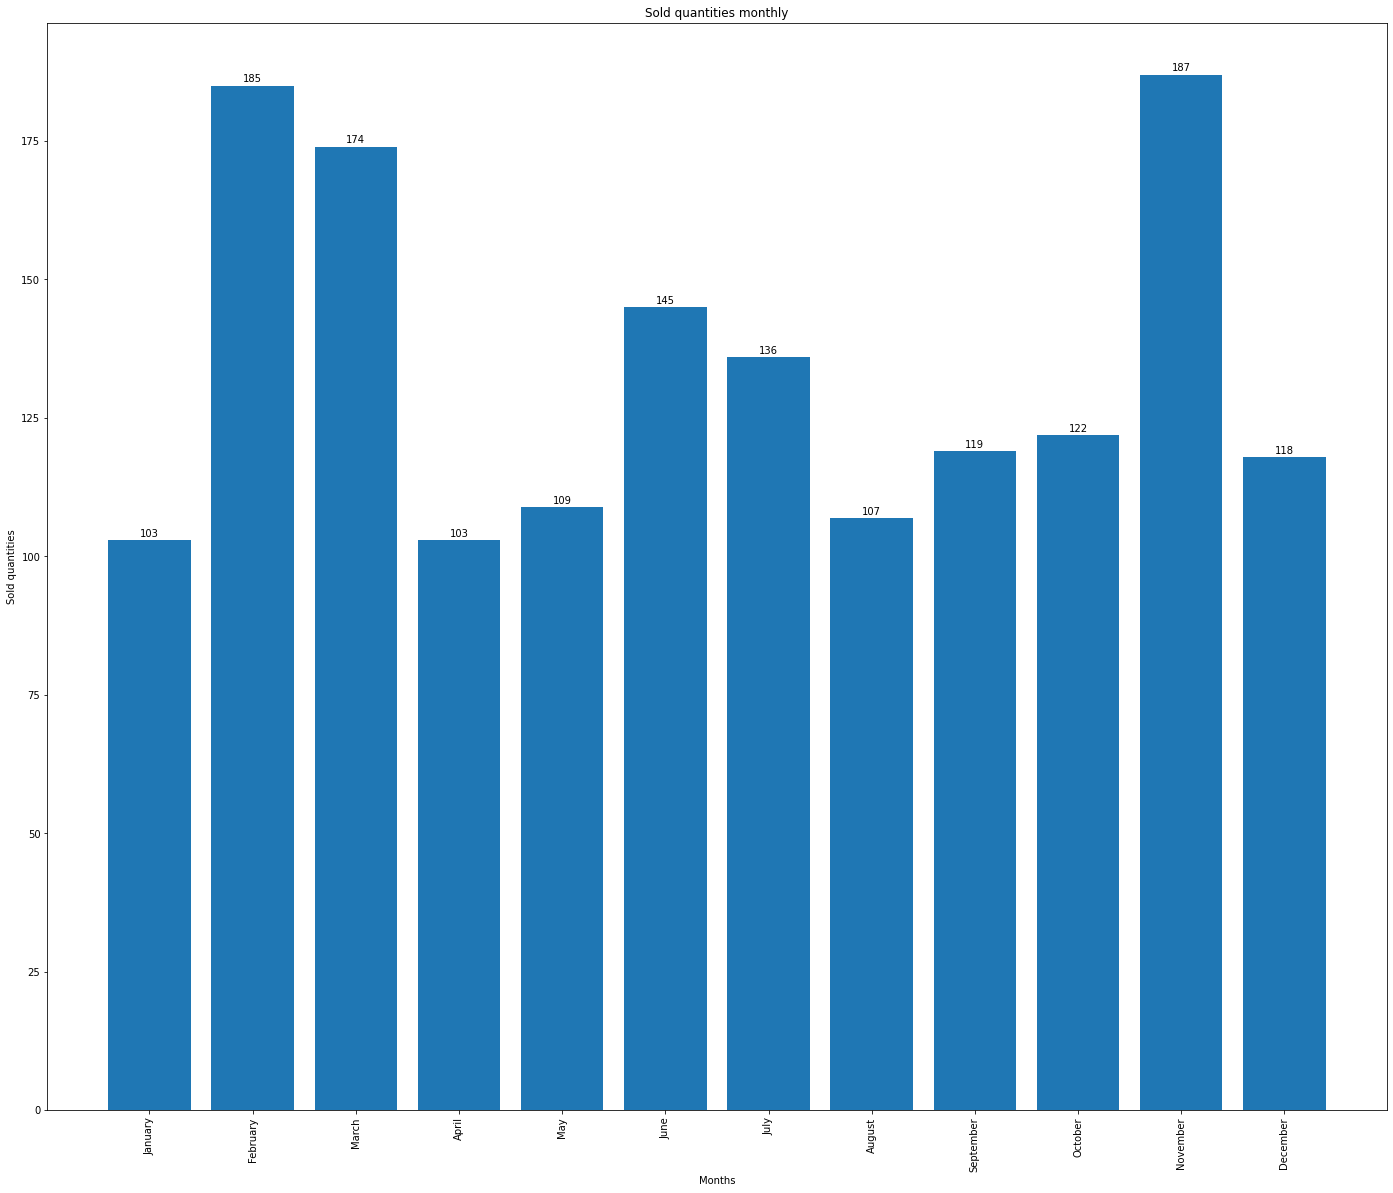

In [24]:
# define subplots
figure, axis = plt.subplots()

# Define x axis 
plt.xticks(months, calendar.month_name[1:13], rotation=90)

# plot graph
plot = axis.bar(months, sold_quantity)

for rectangle in plot:
  height = rectangle.get_height()
  axis.text(rectangle.get_x() + rectangle.get_width() /2., 1.002 * height, '%d' % int(height), ha='center', va = 'bottom')

plt.title('Sold quantities monthly')
plt.xlabel('Months')
plt.ylabel('Sold quantities')
# Step 6: Display the graph on the screen. 
plt.show()

We could change x-axis to y-axis

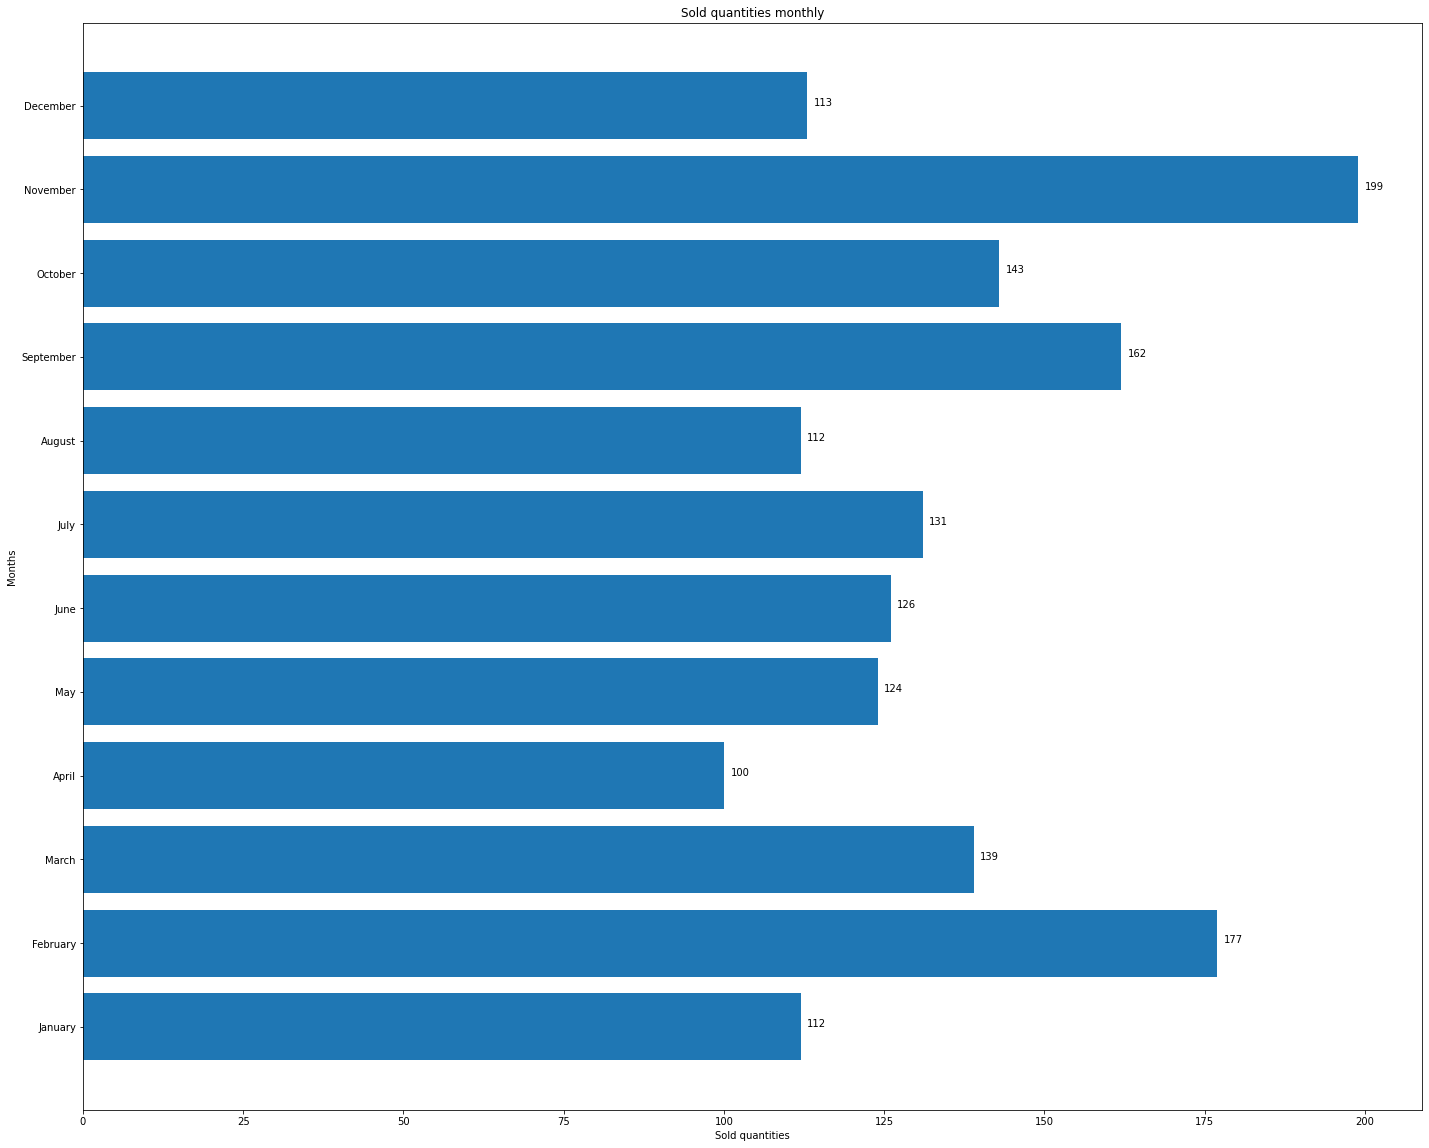

In [25]:
months = list(range(1, 13))
sold_quantity = [round(random.uniform(100, 200)) for x in range(1, 13)]

figure, axis = plt.subplots()

# y axis 
plt.yticks(months, calendar.month_name[1:13], rotation=0)

plot = axis.barh(months, sold_quantity)

for rectangle in plot:
  width = rectangle.get_width()
  axis.text(width + 2.5, rectangle.get_y() + 0.38, '%d' % int(width), ha='center', va = 'bottom')

plt.title('Sold quantities monthly')
plt.ylabel('Months')
plt.xlabel('Sold quantities')
plt.show()

### Scatter Plots 

In [26]:
girls_grades = [89, 90, 70, 89, 100, 80, 90, 100, 80, 34]
boys_grades = [30, 29, 49, 48, 100, 48, 38, 45, 20, 30]
grades_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


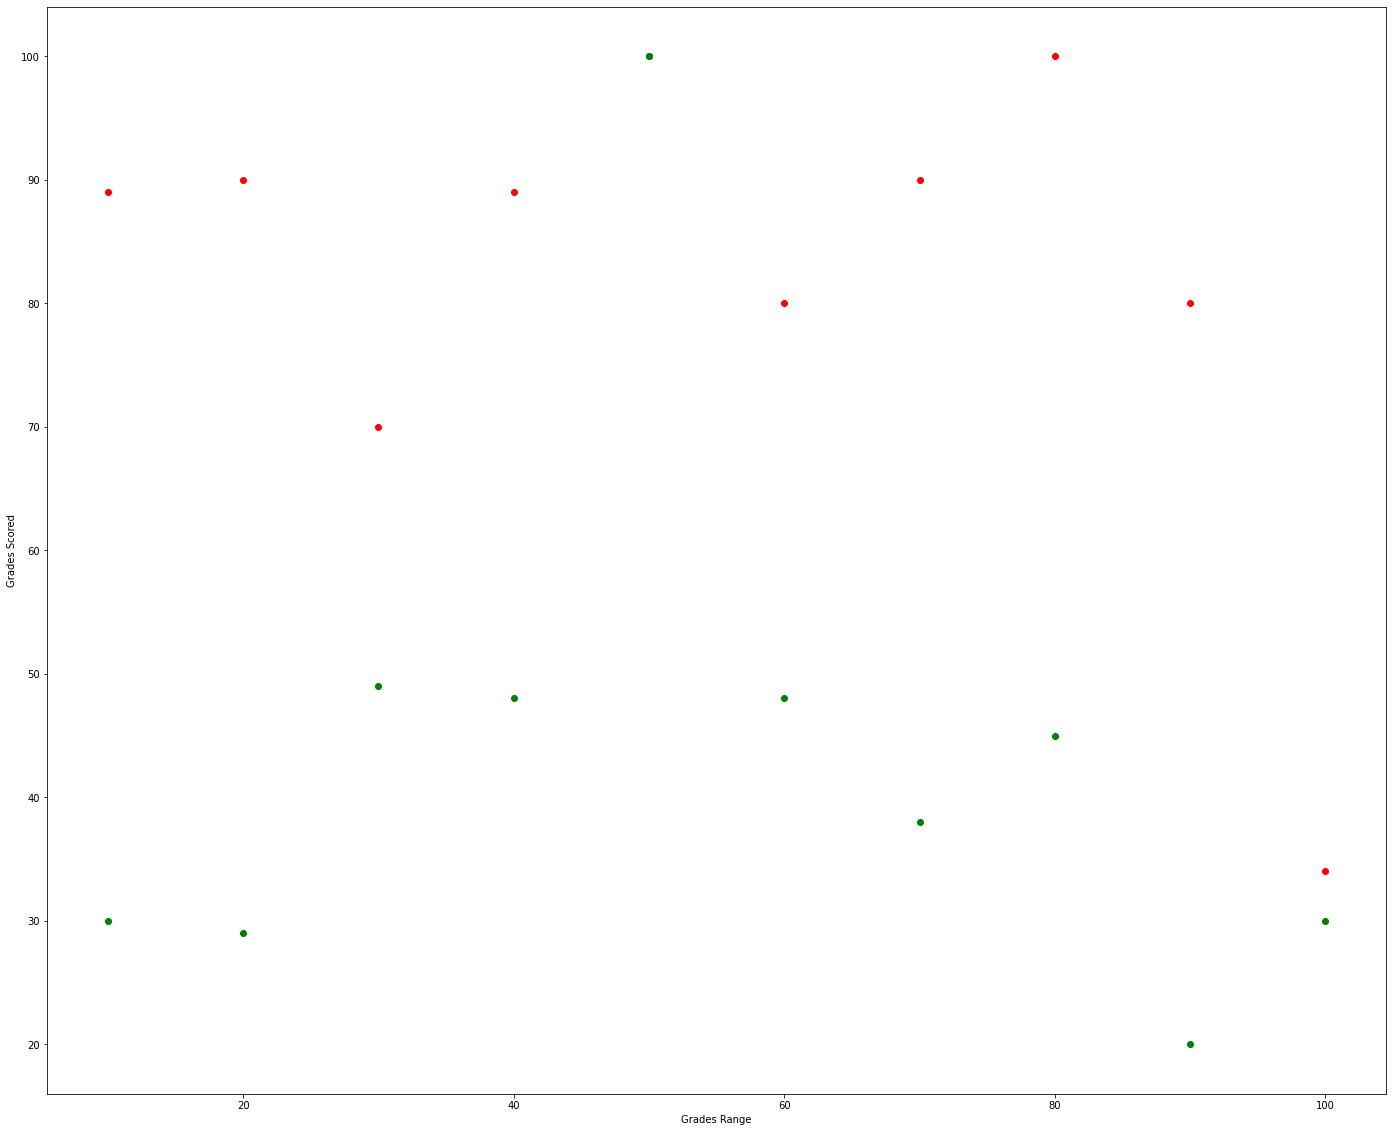

In [27]:
plt.scatter(grades_range, girls_grades, color='r')
plt.scatter(grades_range, boys_grades, color='g')
plt.xlabel('Grades Range')
plt.ylabel('Grades Scored')
plt.show()

#### Sea level

In [28]:
df = pd.read_csv('data/epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [29]:
year = df['Year']
sea_levels = df['CSIRO Adjusted Sea Level']*2.54 # convert inches to centimeters

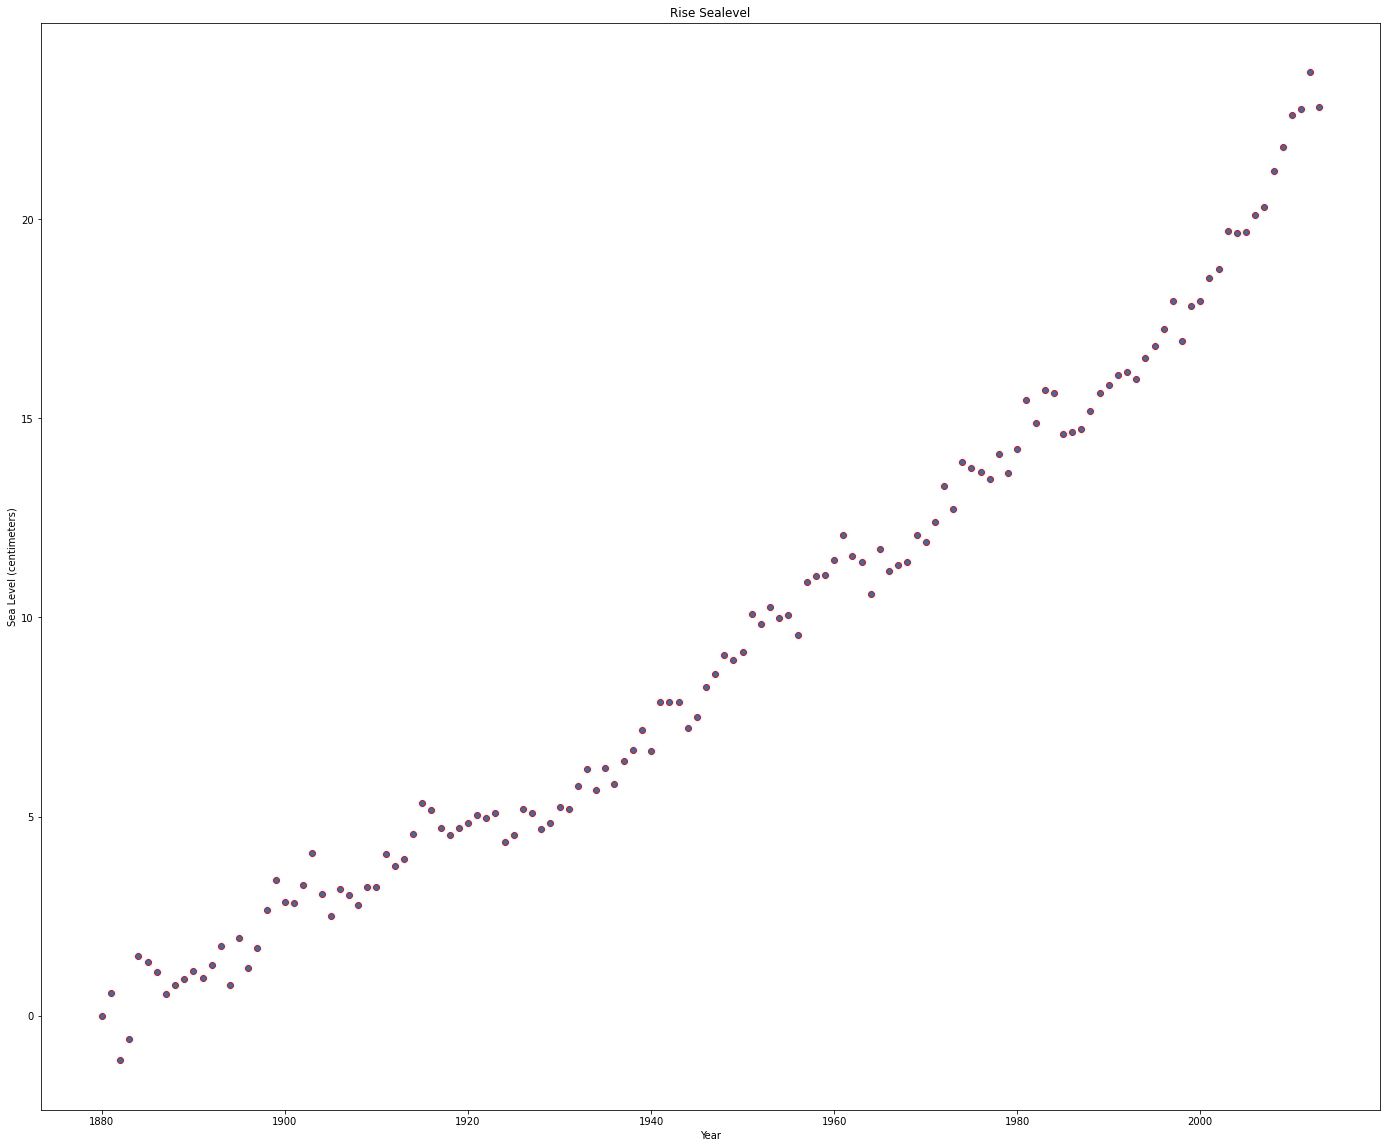

In [30]:
plt.scatter(year, sea_levels, edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Sea Level (centimeters)')
plt.title('Rise Sealevel')
plt.show()

### Bubble plot

In [31]:

df = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

URLError: <urlopen error [Errno 111] Connection refused>

In [ ]:
df.head()


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
df.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [ ]:
df.shape

(195, 43)

#### Drop columns

In [ ]:
df = df.drop(columns = ['Type', 'Coverage', 'AREA', 'AreaName',      'REG', 'RegName', 'DEV', 'DevName',]).set_index('OdName')

In [ ]:
df.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
venezuela = df.loc['Venezuela (Bolivarian Republic of)']
brasil = df.loc['Brazil']

##### Normalize the Data

In [ ]:
v_normal = venezuela / venezuela.max()
b_normal = brasil / brasil.max()

In [ ]:
years = list(range(1980, 2014))

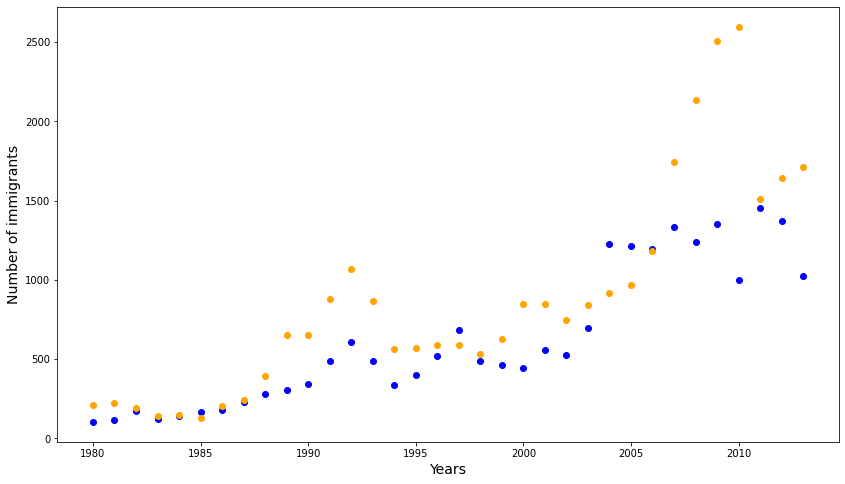

In [ ]:

plt.figure(figsize=(14, 8))
plt.scatter(years, venezuela, color='blue')
plt.scatter(years, brasil, color='orange')
plt.xlabel("Years", size=14)
plt.ylabel("Number of immigrants", size=14)
plt.show()

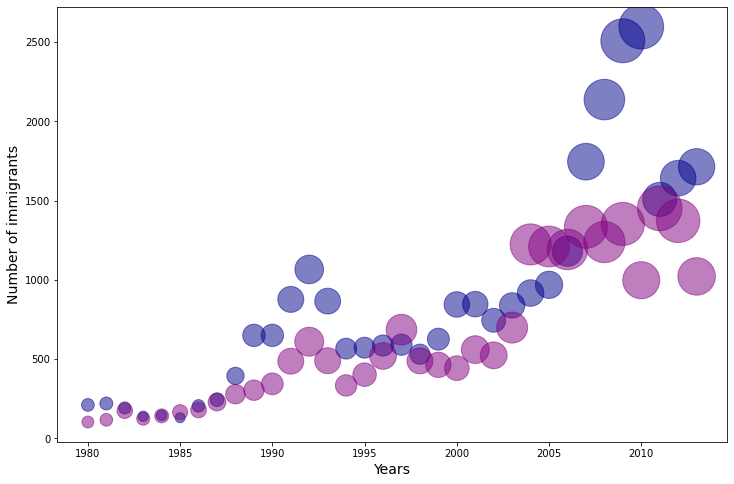

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(years, brasil, 
                  color='darkblue', 
                 alpha=0.5,
                 s = b_normal * 2000)
plt.scatter(years, venezuela, 
                  color='purple', 
                 alpha=0.5,
                 s = v_normal * 2000,
                 )
plt.xlabel("Years", size=14)
plt.ylabel("Number of immigrants", size=14)
plt.show()

### Area plot and stacked plot

In [ ]:
days = [1,2,3,4,5]
sleeping = [7,8,6,11,7]
eating = [2,3,4,3,2]
working = [7,8,7,2,2]
playing = [8,5,7,8,13]

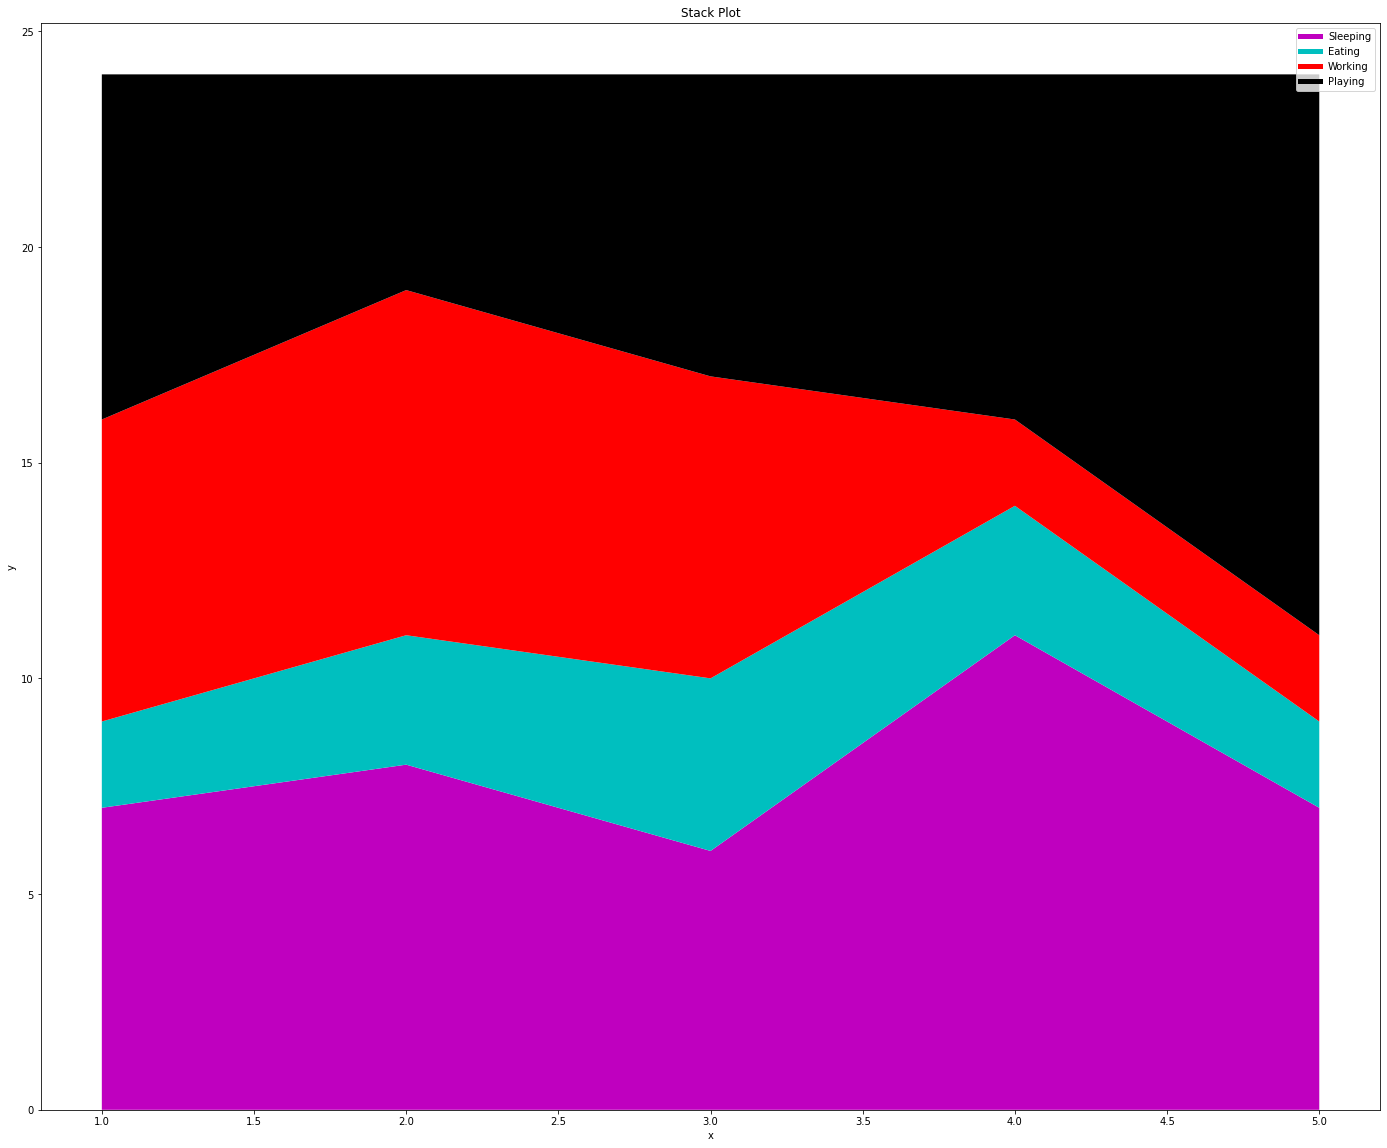

In [ ]:
plt.plot([],[],color='m', label='Sleeping', linewidth=5)
plt.plot([],[],color='c', label='Eating', linewidth=5)
plt.plot([],[],color='r', label='Working', linewidth=5)
plt.plot([],[],color='k', label='Playing', linewidth=5)
plt.stackplot(days, sleeping,eating,working,playing, colors=['m','c','r','k'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Stack Plot')
plt.legend()
plt.show()

### Pie chart

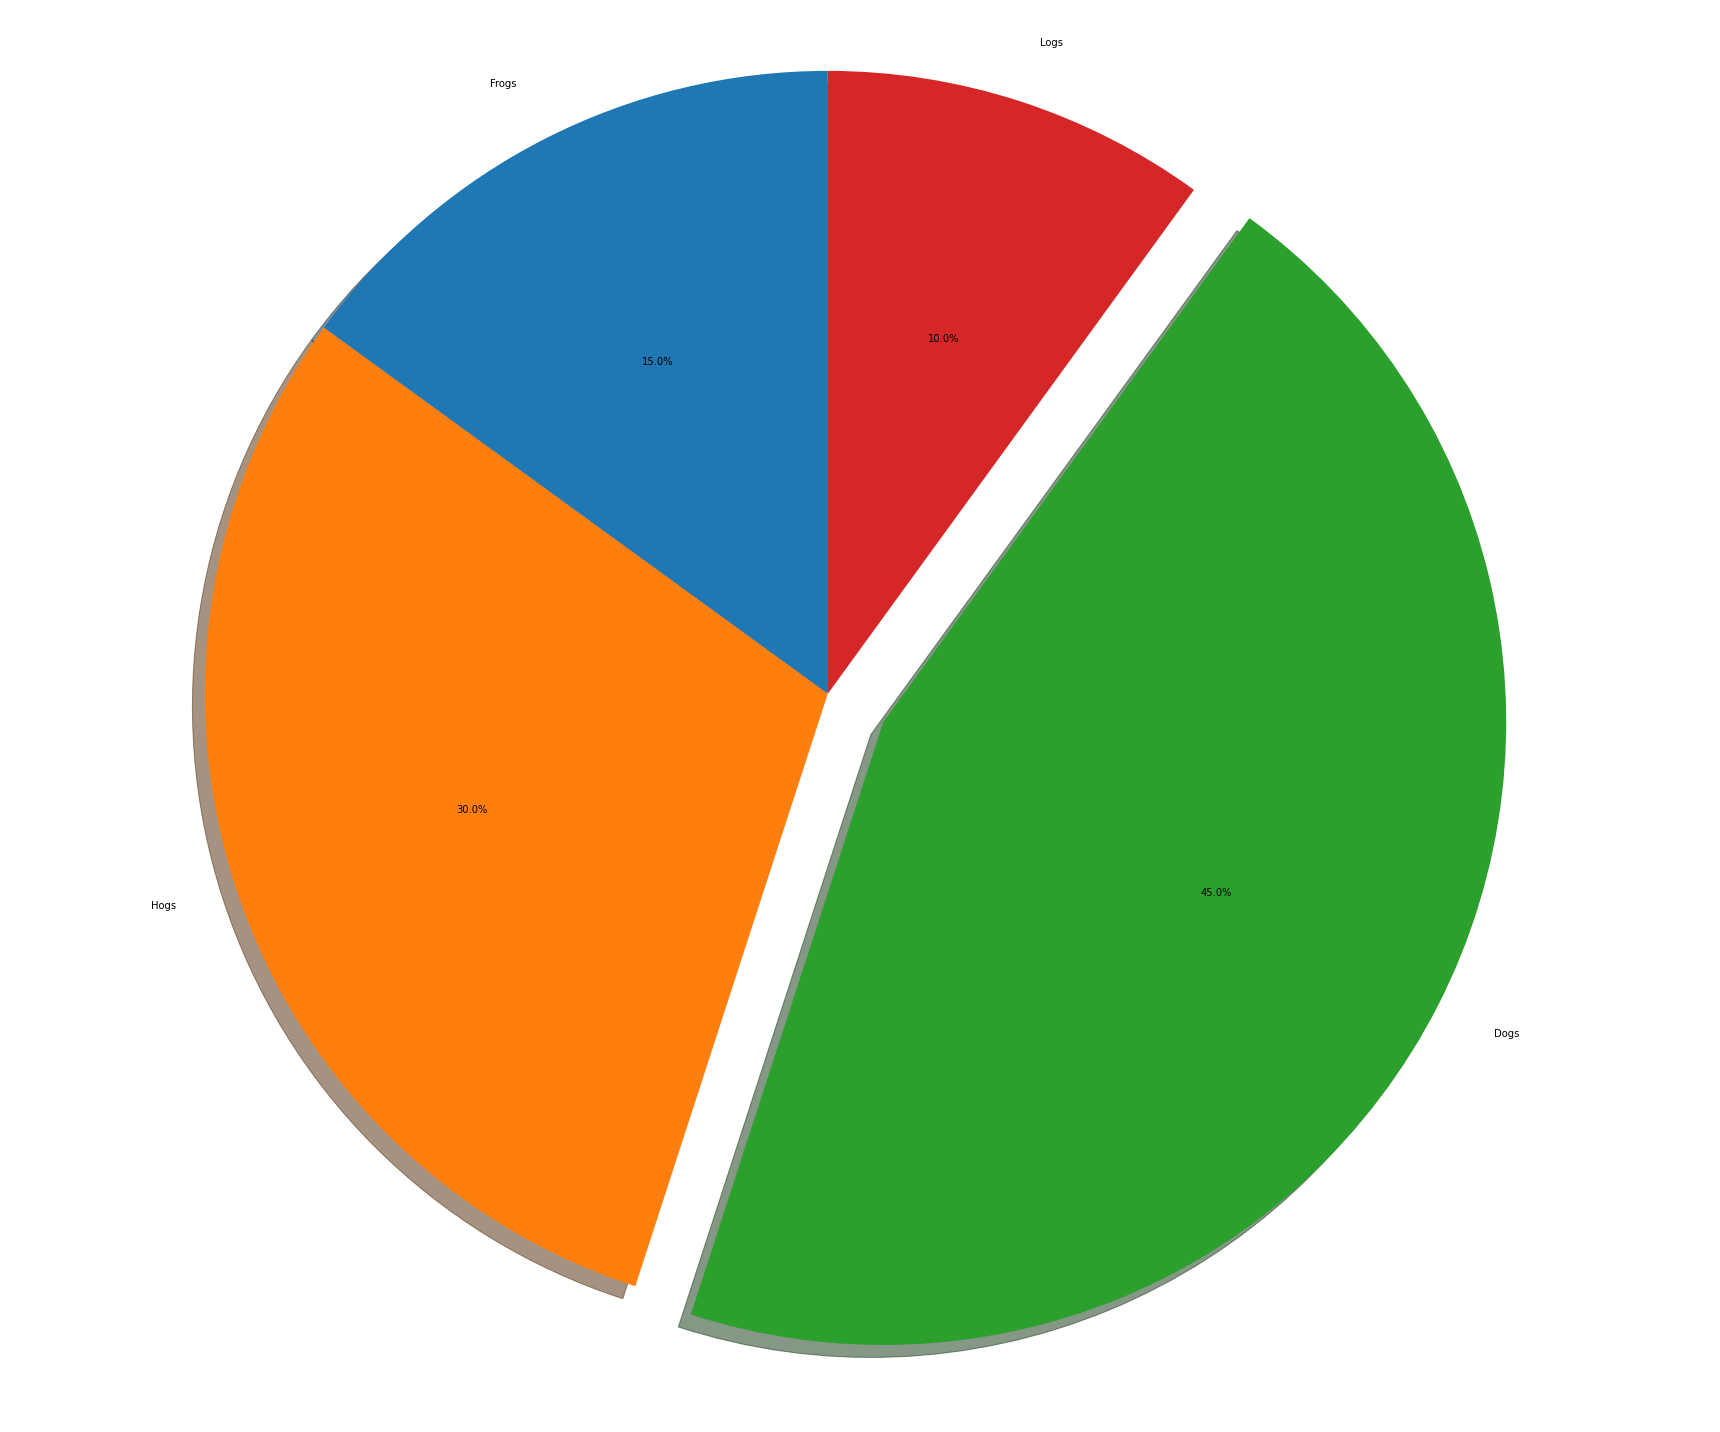

In [ ]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
explode = (0, 0, 0.1, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()

plt.show()

#### Pokemon type

In [ ]:
url = 'https://raw.githubusercontent.com/hmcuesta/PDA_Book/master/Chapter3/pokemonByType.csv'

pokemon = pd.read_csv(url, index_col='type')

pokemon.head()

,amount
type,
Bug,45
Dark,16
Dragon,12
Electric,7
Fighting,3


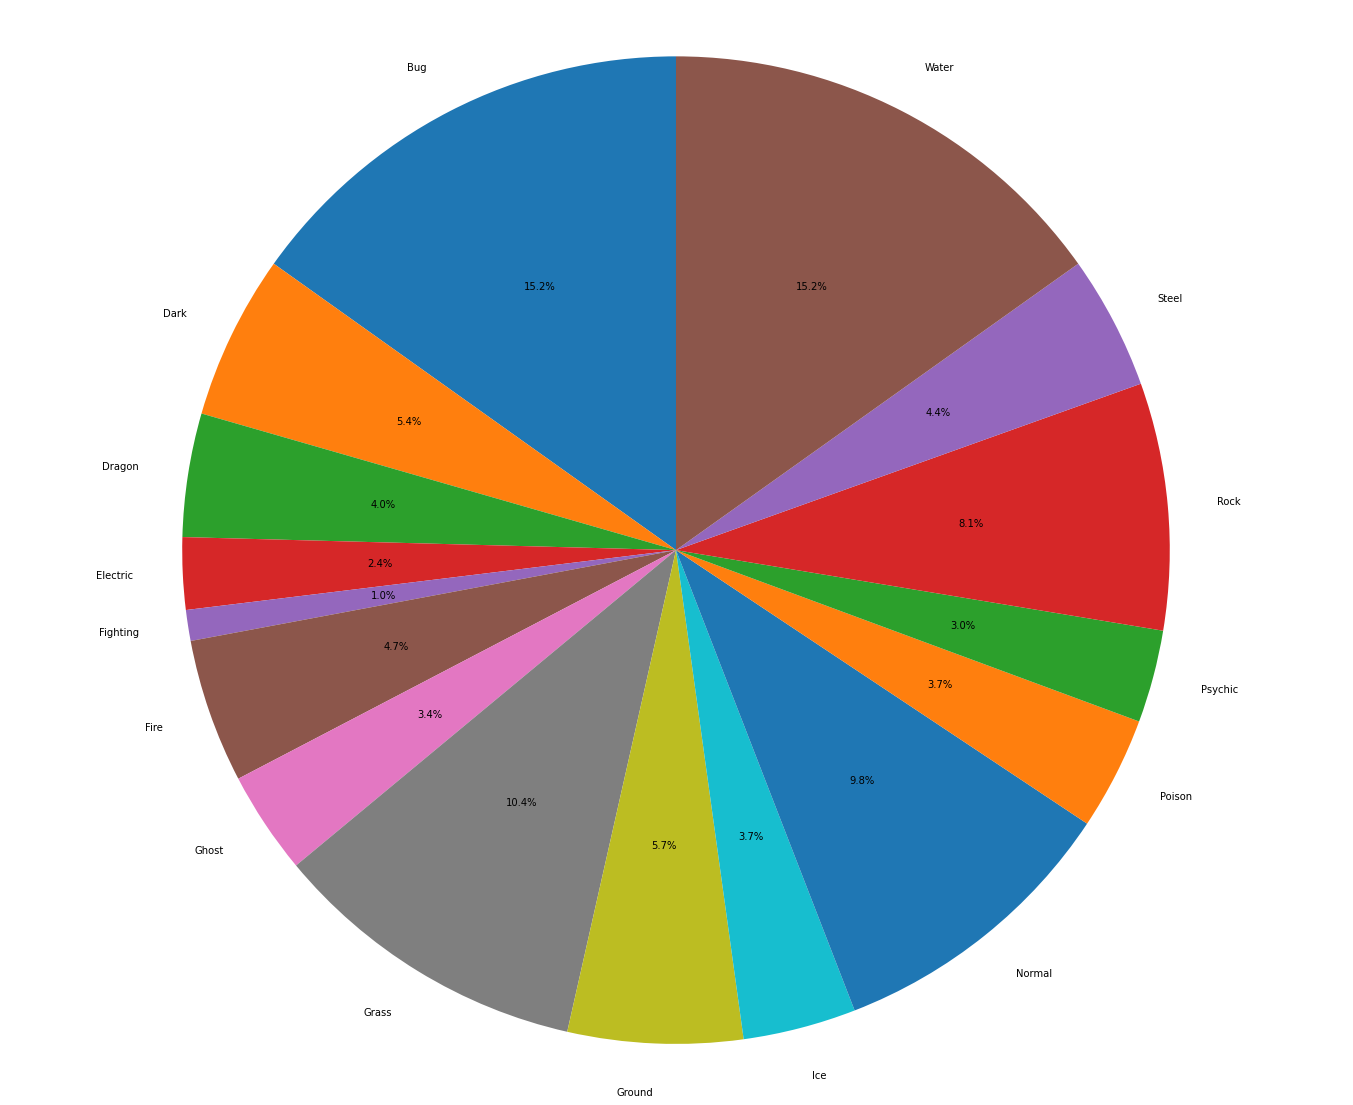

In [ ]:


plt.pie(pokemon['amount'], labels=pokemon.index, shadow=False, startangle=90, autopct='%1.1f%%',)
plt.axis('equal') 
plt.show()


### Circle graph

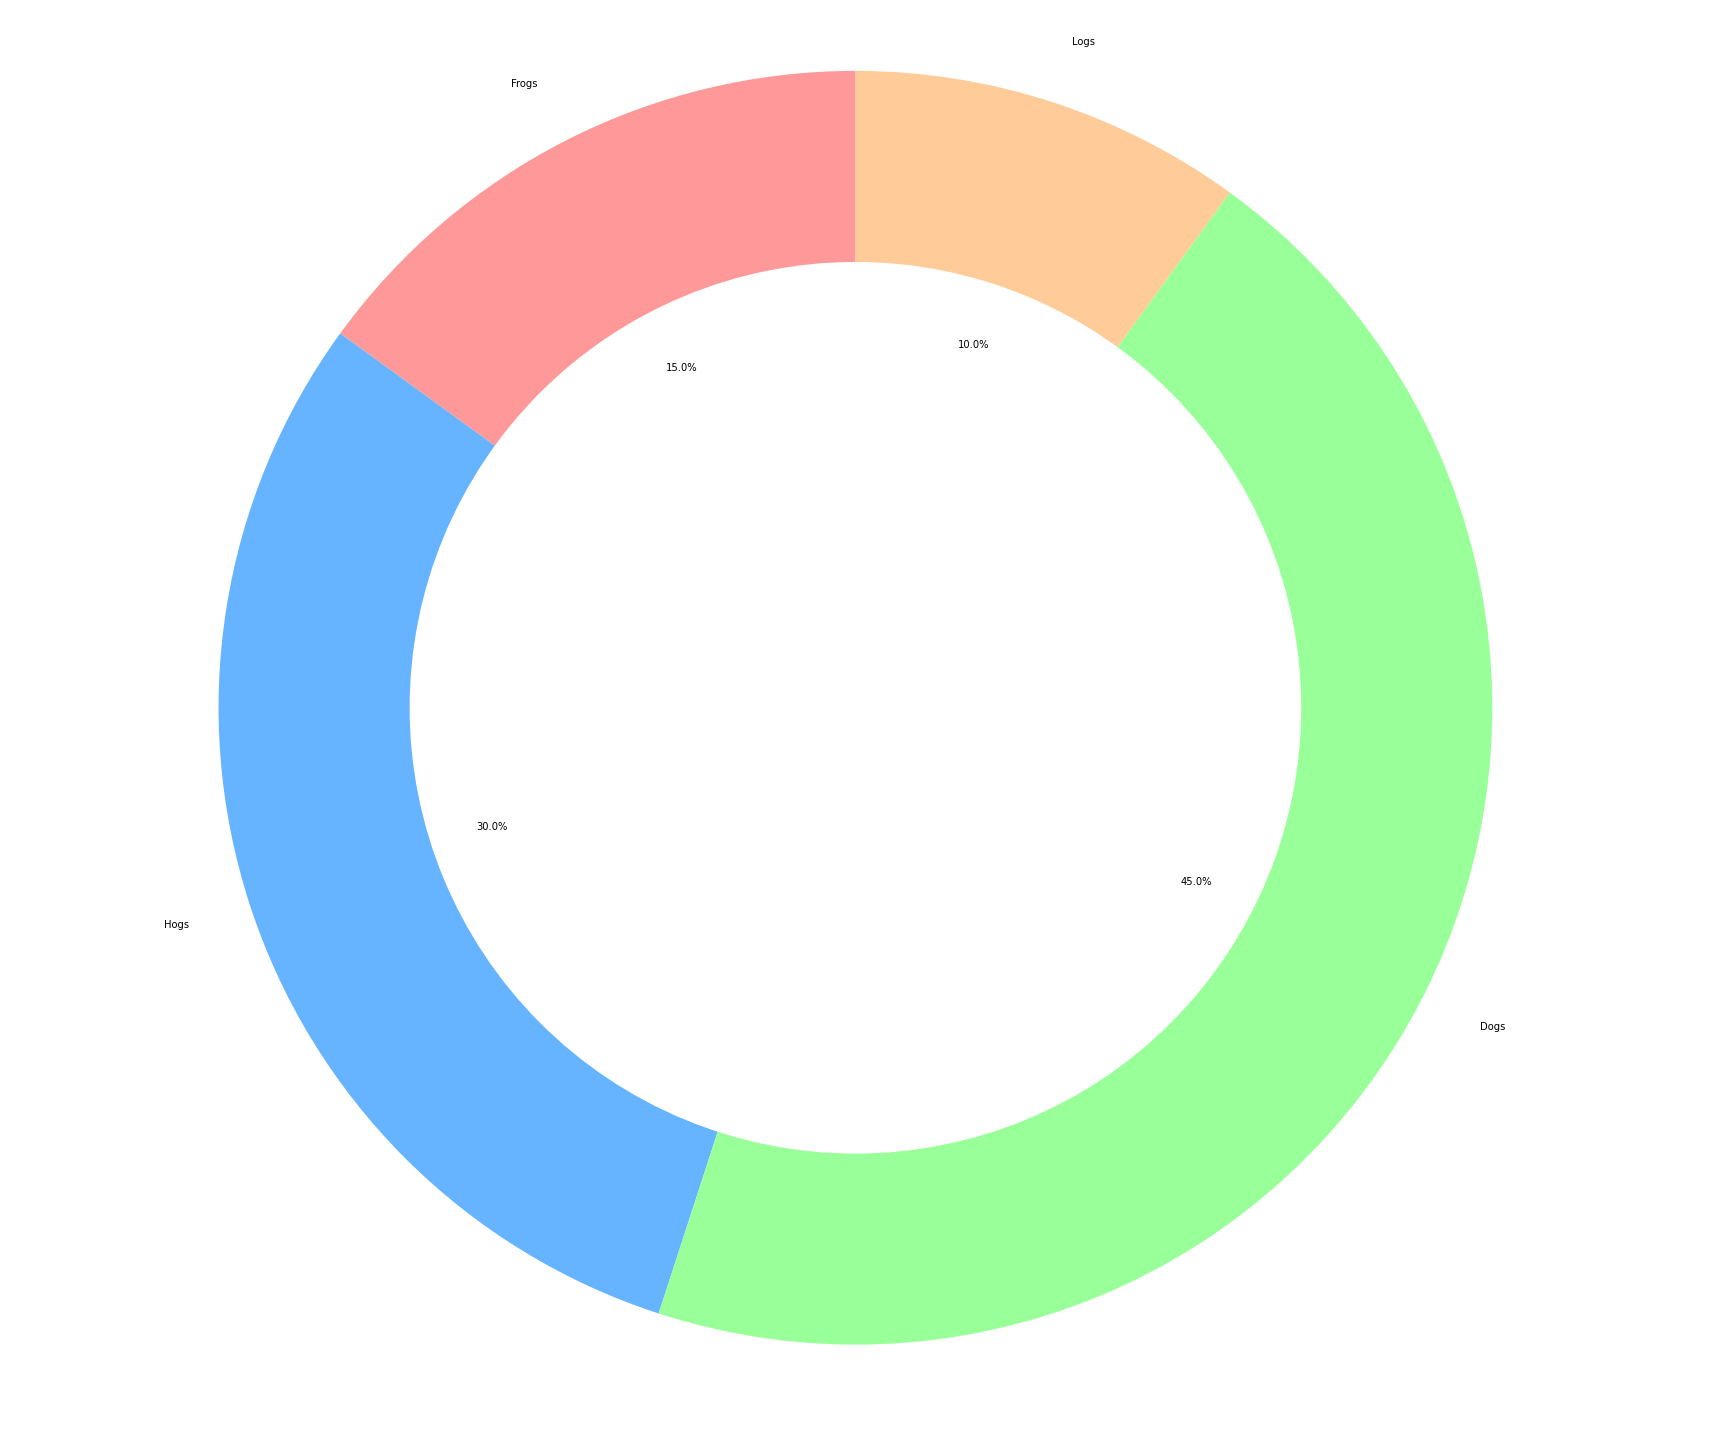

In [ ]:

# Pie chart
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### Table chart


In [ ]:
# Years under consideration
years = ["2010", "2011", "2012", "2013", "2014"]

# Available watt
columns = ['4.5W', '6.0W', '7.0W','8.5W','9.5W','13.5W','15W']
unitsSold = [
             [65, 141, 88, 111, 104, 71, 99],
             [85, 142, 89, 112, 103, 73, 98],
             [75, 143, 90, 113, 89, 75, 93],
             [65, 144, 91, 114, 90, 77, 92],
             [55, 145, 92, 115, 88, 79, 93],
            ]

# Define the range and scale for the y axis
values = np.arange(0, 600, 100)

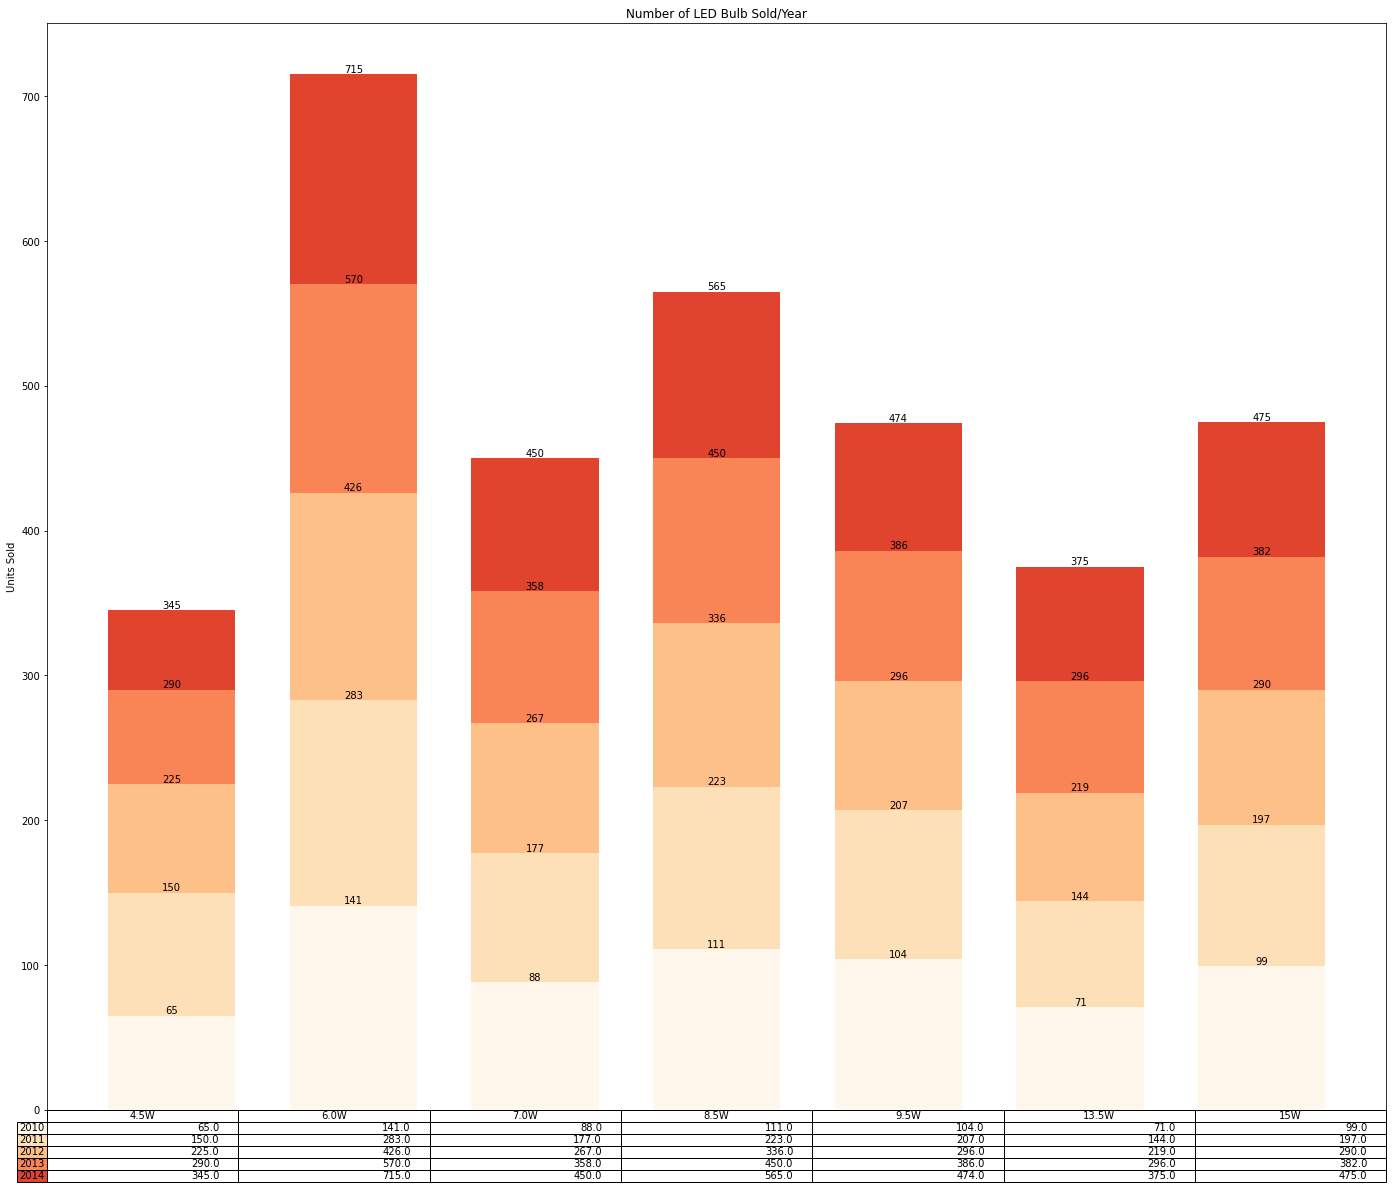

In [ ]:
colors = plt.cm.OrRd(np.linspace(0, 0.7, len(years)))
index = np.arange(len(columns)) + 0.3
bar_width = 0.7

y_offset = np.zeros(len(columns))
fig, ax = plt.subplots()

cell_text = []

n_rows = len(unitsSold)
for row in range(n_rows):
    plot = plt.bar(index, unitsSold[row], bar_width, bottom=y_offset, 
                   color=colors[row])
    y_offset = y_offset + unitsSold[row]
    cell_text.append(['%1.1f' % (x) for x in y_offset])
    i=0
# Each iteration of this for loop, labels each bar with corresponding value for the given year
    for rect in plot:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, y_offset[i],'%d' 
                % int(y_offset[i]), 
                ha='center', va='bottom')
        i = i+1 

# Add a table to the bottom of the axes
the_table = plt.table(cellText=cell_text, rowLabels=years, 
                rowColours=colors, colLabels=columns, loc='bottom')
plt.ylabel("Units Sold")
plt.xticks([])
plt.title('Number of LED Bulb Sold/Year')
plt.show()


#### Time using in different hobbies

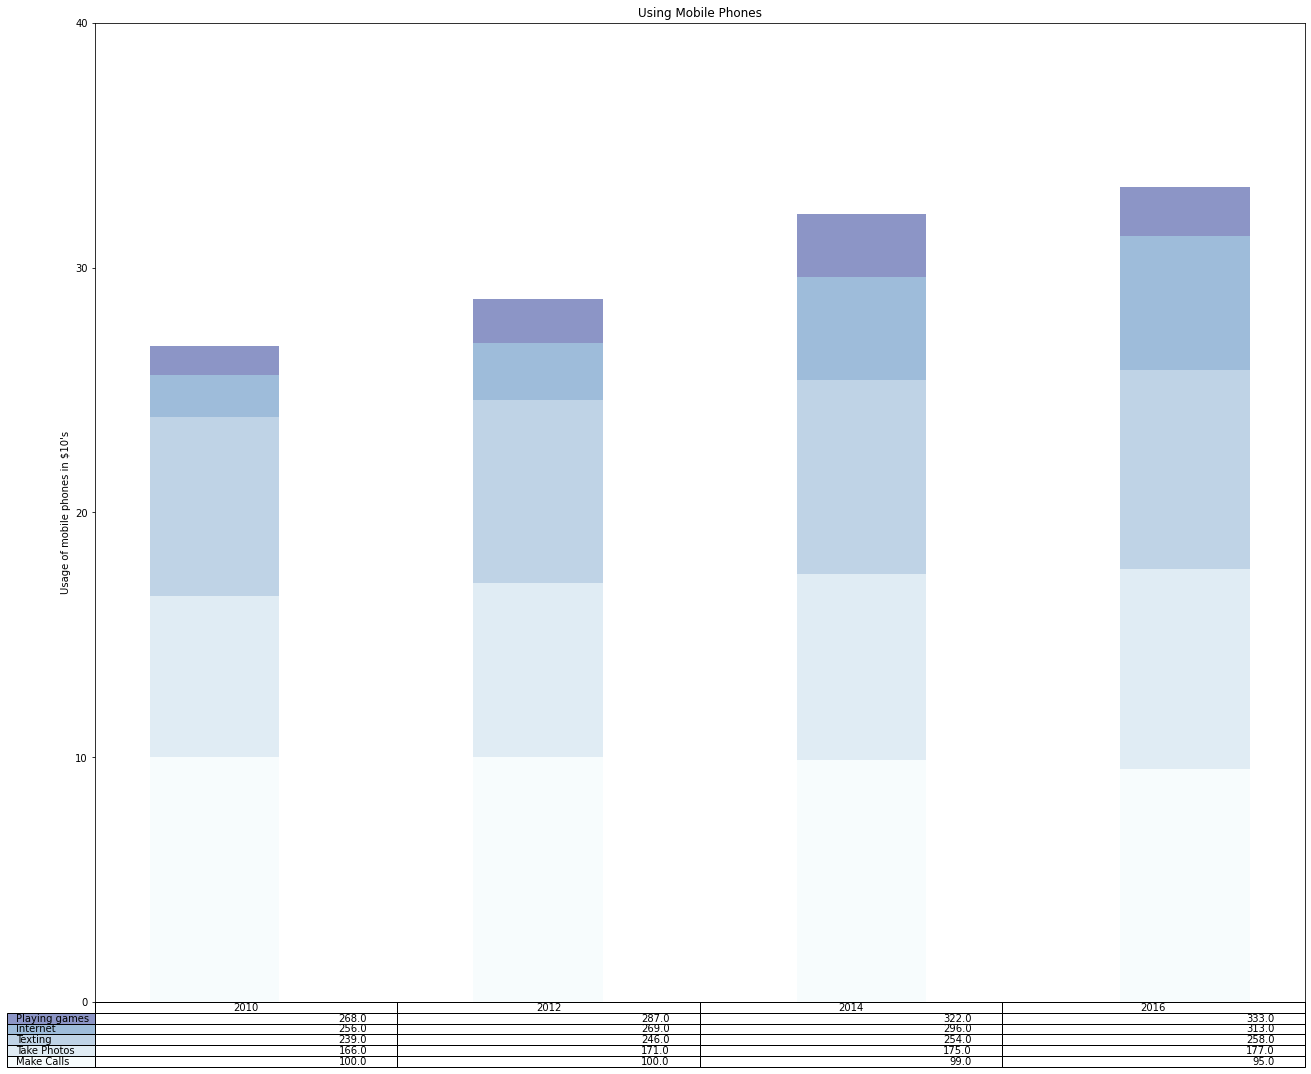

In [ ]:

 
 
data = [[ 100, 100,  99, 95],
        [ 66, 71,  76,  82],
        [ 73,  75, 79, 81],
        [ 17,  23, 42, 55],
        [ 12, 18, 26, 20]]
 
columns = ('2010', '2012', '2014', '2016')
rows = ("Make Calls", "Take Photos", "Texting", "Internet", "Playing games")[::-1]
 
values = np.arange(0, 50, 10)
value_increment = 10
 
# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)
 
index = np.arange(len(columns)) + 0.3
bar_width = 0.4
 
# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))
 
# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()
 
# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')
 
# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)
 
plt.ylabel("Usage of mobile phones in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Using Mobile Phones')
 
plt.show()

### Treemap chart

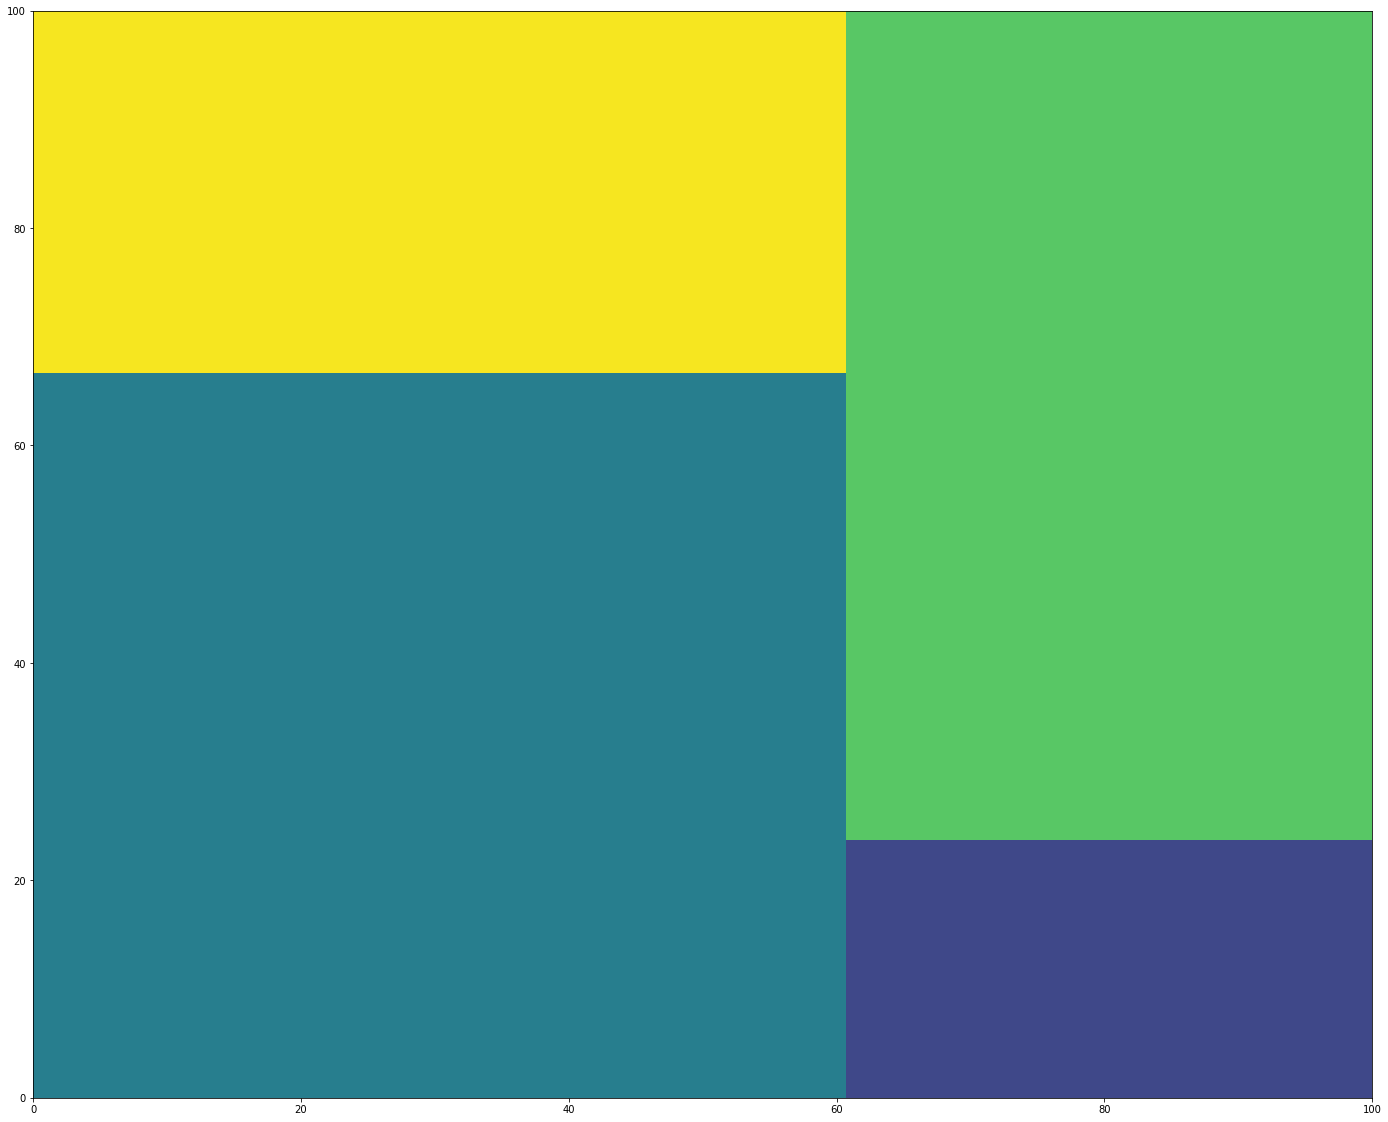

In [32]:
sizes=[100,50,23,74]
squarify.plot(sizes)
plt.show()

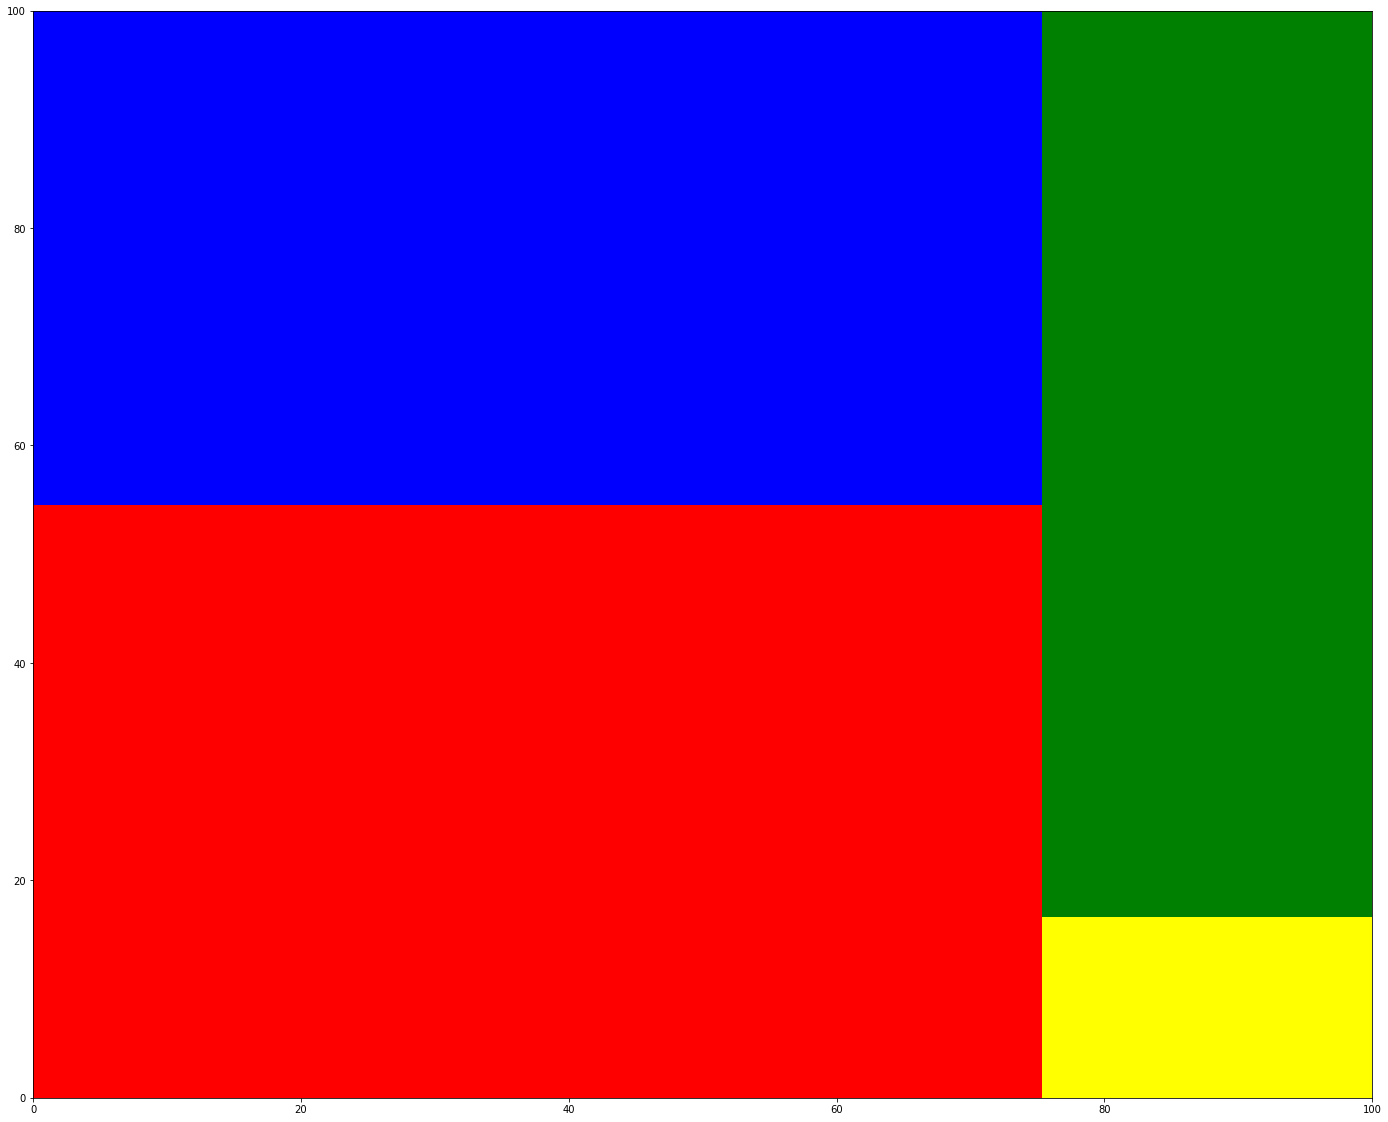

In [33]:



squarify.plot(sizes=[60, 50, 6, 30], color=["Red", "Blue", "Yellow", "Green"])

plt.show()

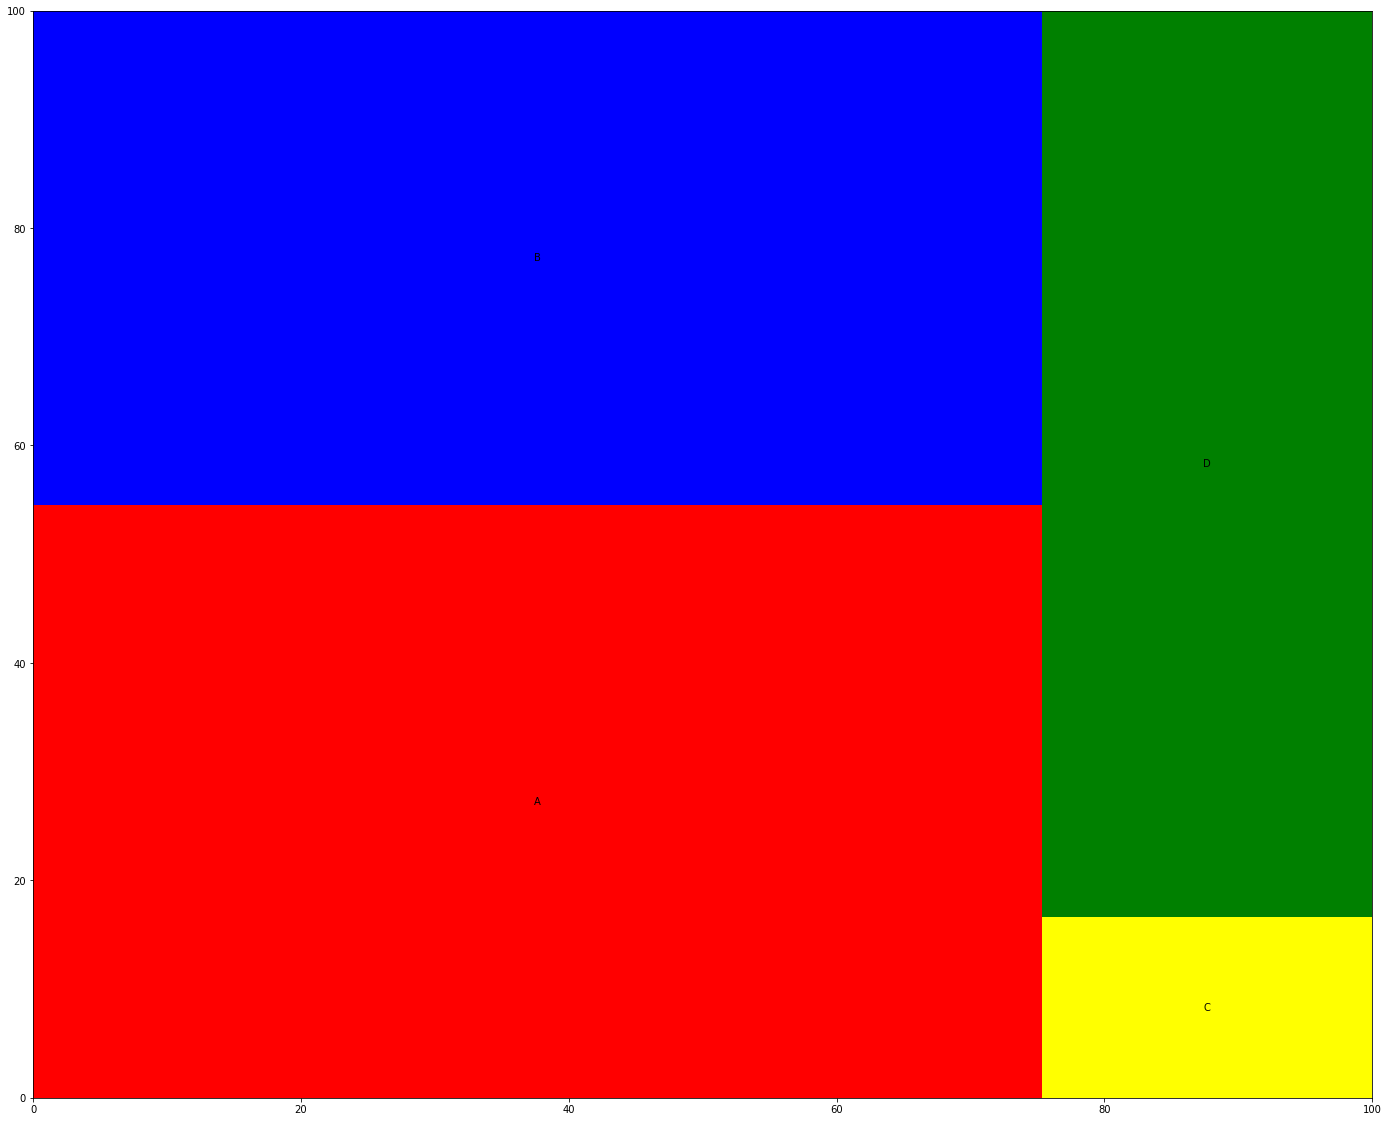

In [34]:



squarify.plot(sizes=[60, 50, 6, 30], color=["Red", "Blue", "Yellow", "Green"], label=["A", "B", "C", "D"])

plt.show()

#### Stock market

In [35]:
df = pd.read_csv("https://raw.githubusercontent.com/hashABCD/Publications/main/Medium/Treemap%20in%20python/market_cap_top20.csv")
df.head()

,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,1,AAPL,Apple Inc.,Technology,Consumer Electronics,USA,2165.05B,29.22,130.21,0.36%,"7,83,39,673"
1,2,MSFT,Microsoft Corporation,Technology,Software - Infrastructure,USA,1880.86B,34.36,252.46,1.09%,"2,69,92,758"
2,3,AMZN,"Amazon.com, Inc.",Consumer Cyclical,Internet Retail,USA,1667.50B,62.64,3291.61,-0.45%,"47,02,758"
3,4,GOOG,Alphabet Inc.,Communication Services,Internet Content & Information,USA,1646.62B,31.97,2398.69,0.73%,"11,61,766"
4,5,GOOGL,Alphabet Inc.,Communication Services,Internet Content & Information,USA,1580.64B,30.38,2351.93,0.62%,"14,44,167"


In [36]:
df.shape

(20, 11)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No.         20 non-null     int64  
 1   Ticker      20 non-null     object 
 2   Company     20 non-null     object 
 3   Sector      20 non-null     object 
 4   Industry    20 non-null     object 
 5   Country     20 non-null     object 
 6   Market Cap  20 non-null     object 
 7   P/E         20 non-null     float64
 8   Price       20 non-null     float64
 9   Change      20 non-null     object 
 10  Volume      20 non-null     object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.8+ KB


* We need to remove letter "B" in column Market cap
* We need remove letter "%" and convert to type float (Change and Volume)

In [38]:
df['Market Cap']=df['Market Cap'].apply(lambda x: float(str(x).replace('B','')))
df.Change=df.Change.apply(lambda x:float(str(x).replace('%','')))
df.Volume=df.Volume.apply(lambda x:int(str(x).replace(',','')))

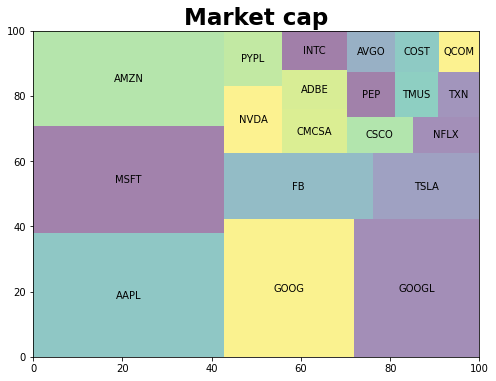

In [39]:
plt.figure(figsize=(8,6))
squarify.plot(df['Market Cap'], label=df.Ticker,alpha=0.5)
plt.axis('on')
plt.title("Market cap",fontsize=23,fontweight="bold")
plt.show()

### The Sankey class


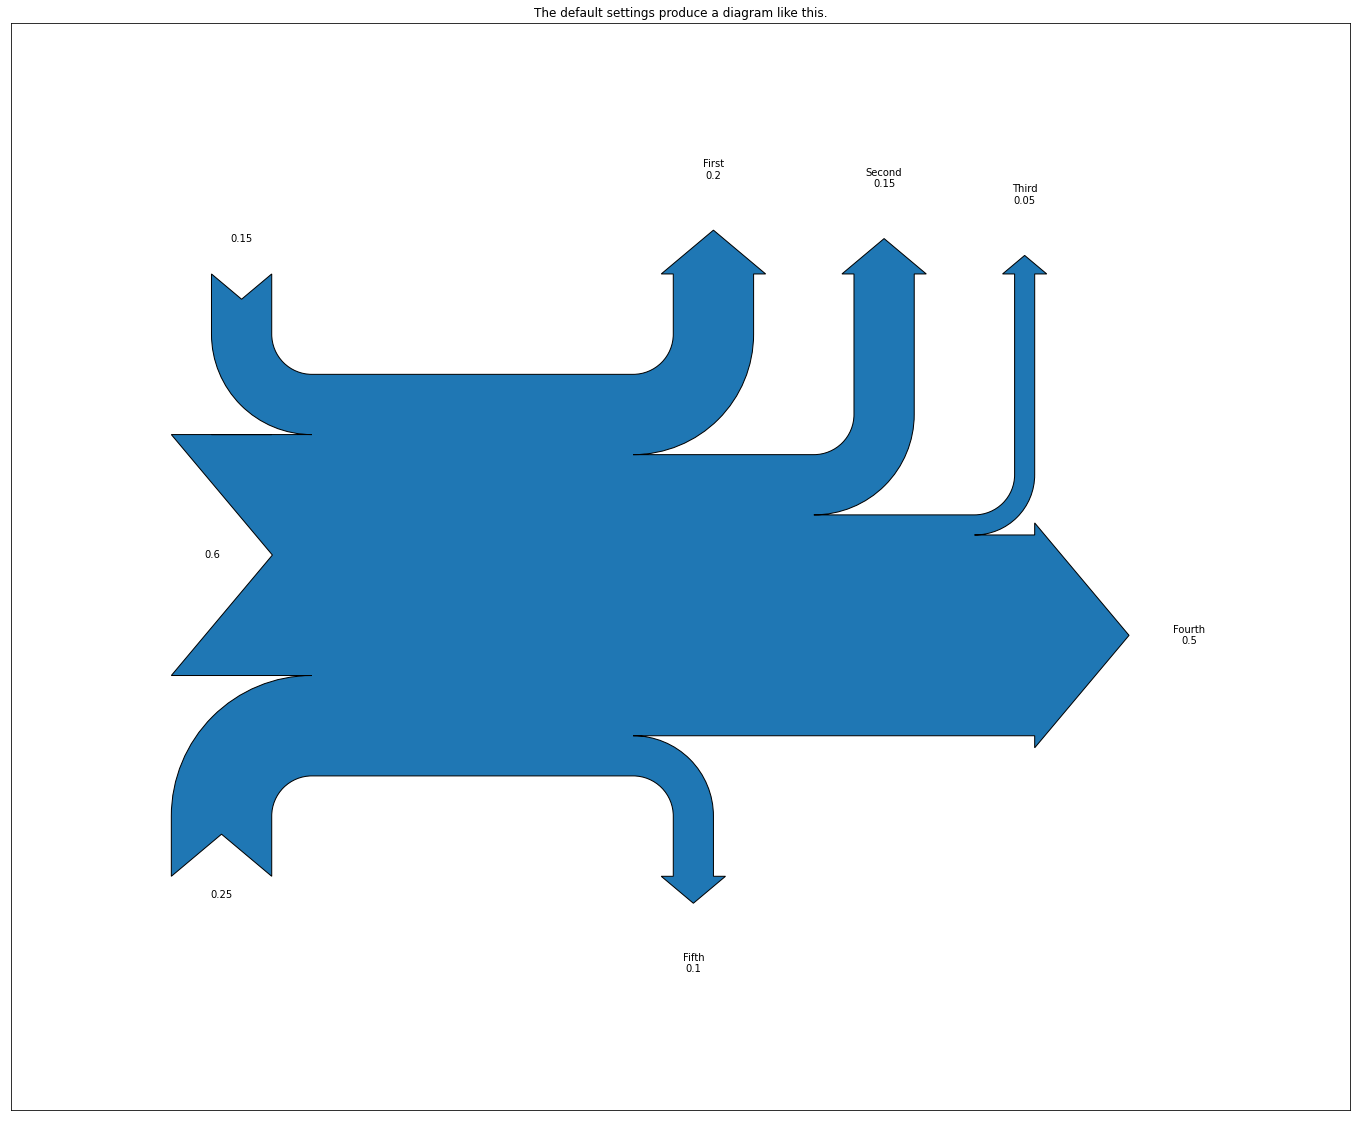

In [40]:
Sankey(flows=[0.25, 0.15, 0.60, -0.20, -0.15, -0.05, -0.50, -0.10],
       labels=['', '', '', 'First', 'Second', 'Third', 'Fourth', 'Fifth'],
       orientations=[-1, 1, 0, 1, 1, 1, 0, -1]).finish()
plt.title("The default settings produce a diagram like this.")
plt.show()

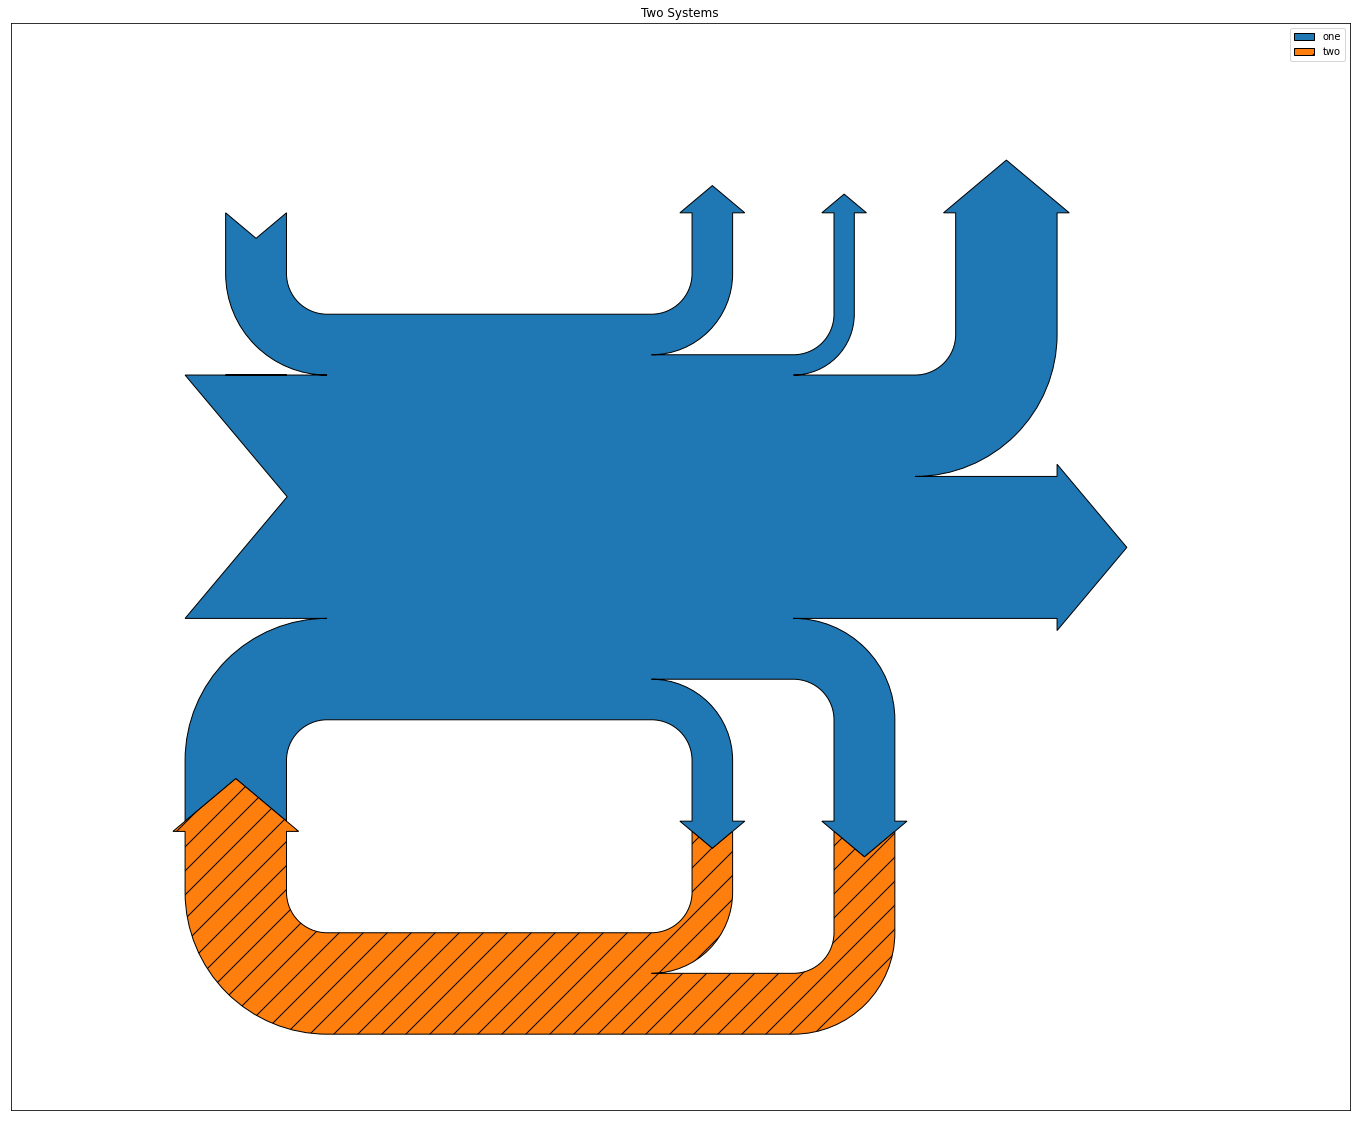

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title="Two Systems")
flows = [0.25, 0.15, 0.60, -0.10, -0.05, -0.25, -0.15, -0.10, -0.35]
sankey = Sankey(ax=ax, unit=None)
sankey.add(flows=flows, label='one',
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0])
sankey.add(flows=[-0.25, 0.15, 0.1], label='two',
           orientations=[-1, -1, -1], prior=0, connect=(0, 0))
diagrams = sankey.finish()
diagrams[-1].patch.set_hatch('/')
plt.legend()
plt.show()

### Polar chart

In [42]:
# Let us assume you have 5 courses in your academic year. 
subjects = ["C programming", "Numerical methods", "Operating system", "DBMS", "Computer Networks"]

# And you planned to obtained following grades in each subject
plannedGrade = [90, 95, 92, 68, 68, 90]

# However, after your final examination, this is the grade you got
actualGrade = [75, 79, 89, 70, 60, 75]

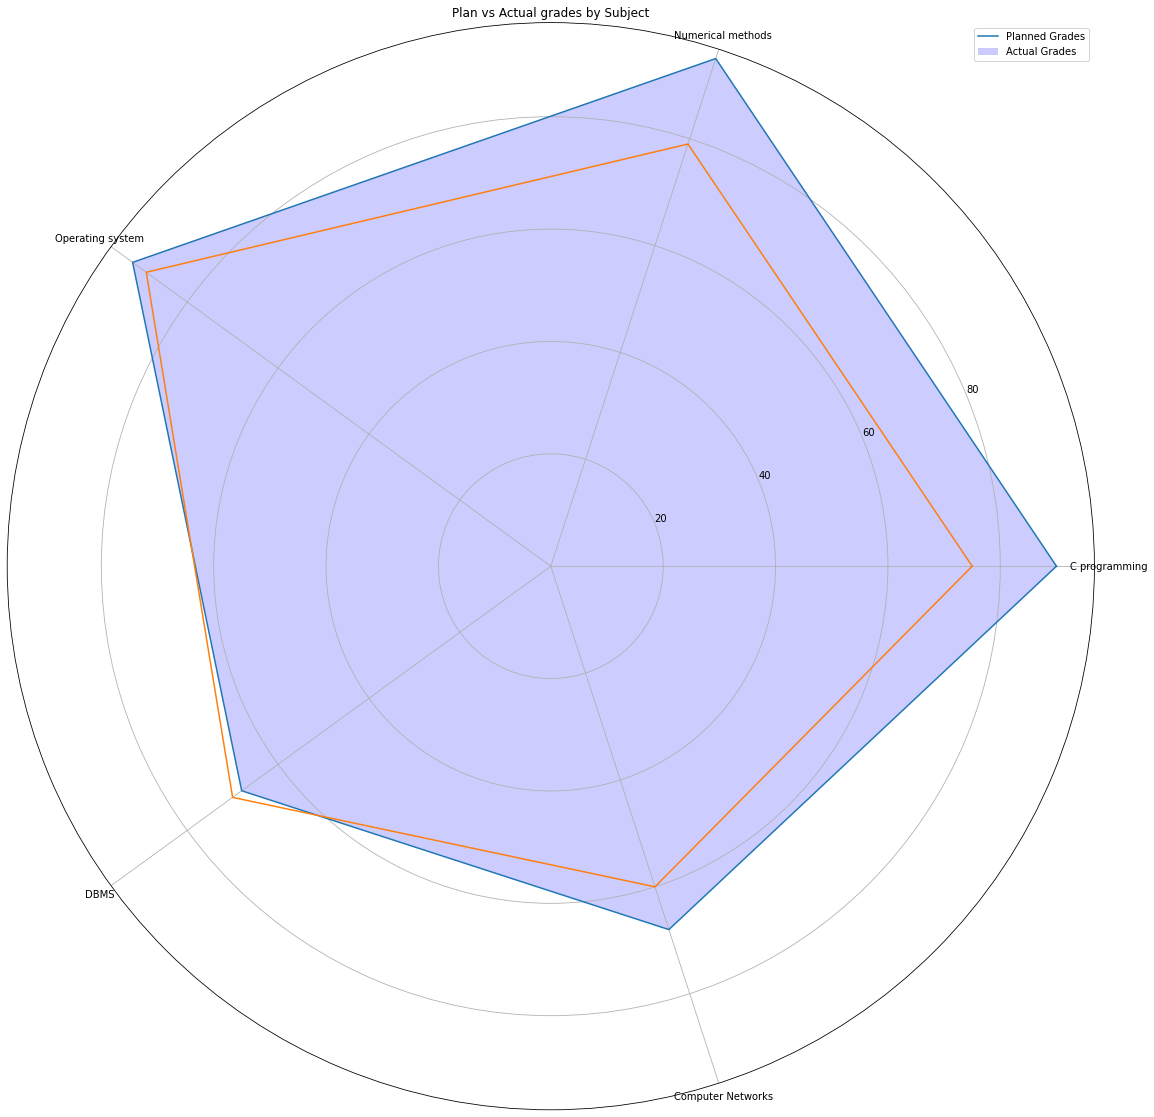

In [43]:


# 2. Prepare the data set. 
# 3. Set up theta

theta = np.linspace(0, 2 * np.pi, len(plannedGrade))

# 4. Initialize the plot by figure size and polar projection
plt.figure(figsize = (24,20))
plt.subplot(polar=True)

# 5. Get the grid lines to align with each of the subject names.
(lines,labels) = plt.thetagrids(range(0,360, int(360/len(subjects))),
                                                (subjects))

# 6. We use plot method to plot the graph. And fill the area under it. 
plt.plot(theta, plannedGrade)
plt.fill(theta, plannedGrade, 'b', alpha=0.2)

# 7. Now, we plot the actual grade obtained
plt.plot(theta, actualGrade)

# 8. Finally, we add a legend and a nice comprehensible title to the plot. 
plt.legend(labels=('Planned Grades','Actual Grades'),loc=1)
plt.title("Plan vs Actual grades by Subject")

# 9. Lastly, we show the plot on the screen. 
plt.show()

### Histogram

In [44]:
df = pd.read_csv("https://raw.githubusercontent.com/rashida048/Datasets/master/nhanes_2015_2016.csv")
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [45]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

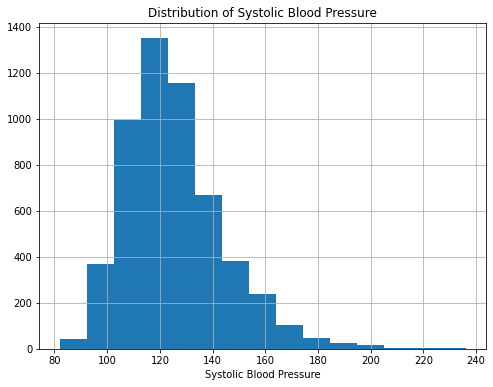

In [46]:
df['BPXSY1'].hist(bins = 15, figsize=(8, 6))
plt.xlabel("Systolic Blood Pressure")
plt.title("Distribution of Systolic Blood Pressure")
plt.show()

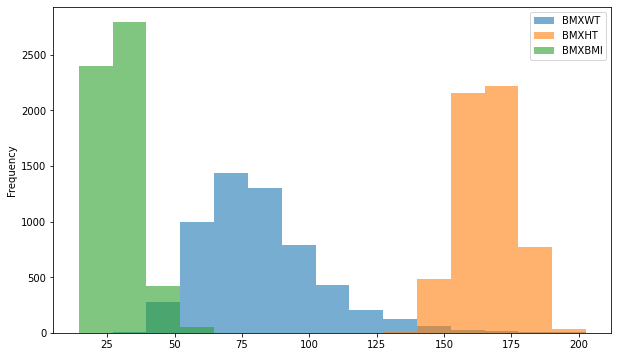

In [47]:
df[['BMXWT', 'BMXHT', 'BMXBMI']].plot.hist(bins = 15, figsize=(10,6), alpha = 0.6)
plt.show()

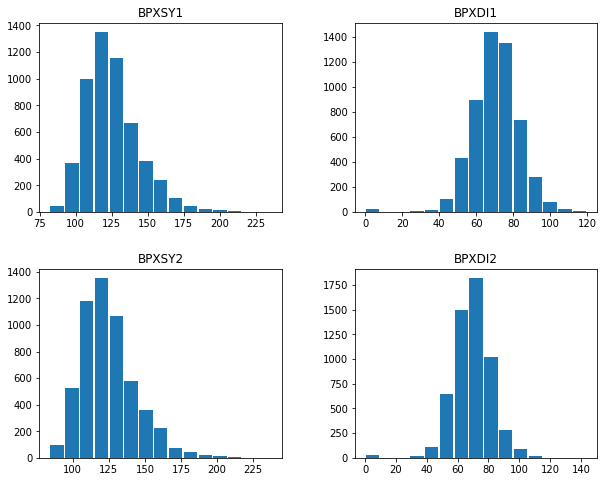

In [48]:
df[['BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2']].hist(
    bins=15,
    figsize=(10, 8),
    grid = False,
    rwidth = 0.9,
)
plt.show()

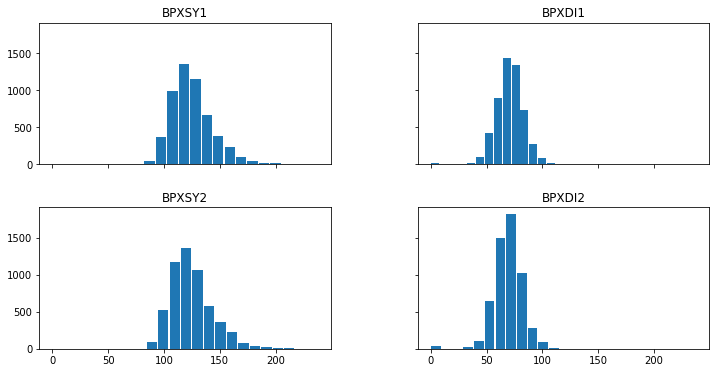

In [49]:
df[['BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2']].hist(
    bins=15,
    figsize=(12, 6),
    grid = False,
    rwidth = 0.9,
    sharex = True,
    sharey = True
)
plt.show()

###  Lollipot chart


In [50]:
# 1. Read the dataset

carDF = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/hands-on-exploratory-data-analysis-with-python/master/Chapter%202/cardata.csv')

# 2. Group by manufacturer and take average milage
processedDF = carDF[['cty','manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())

# 3. Sort the values by cty and reset index
processedDF.sort_values('cty', inplace=True)
processedDF.reset_index(inplace=True)

/tmp/ipykernel_12702/1873169893.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  processedDF = carDF[['cty','manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())


In [51]:
processedDF.head()

,manufacturer,cty
0,lincoln,11.333333
1,land rover,11.500000
2,dodge,13.135135
3,mercury,13.250000
4,jeep,13.500000


In [52]:
processedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  15 non-null     object 
 1   cty           15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes


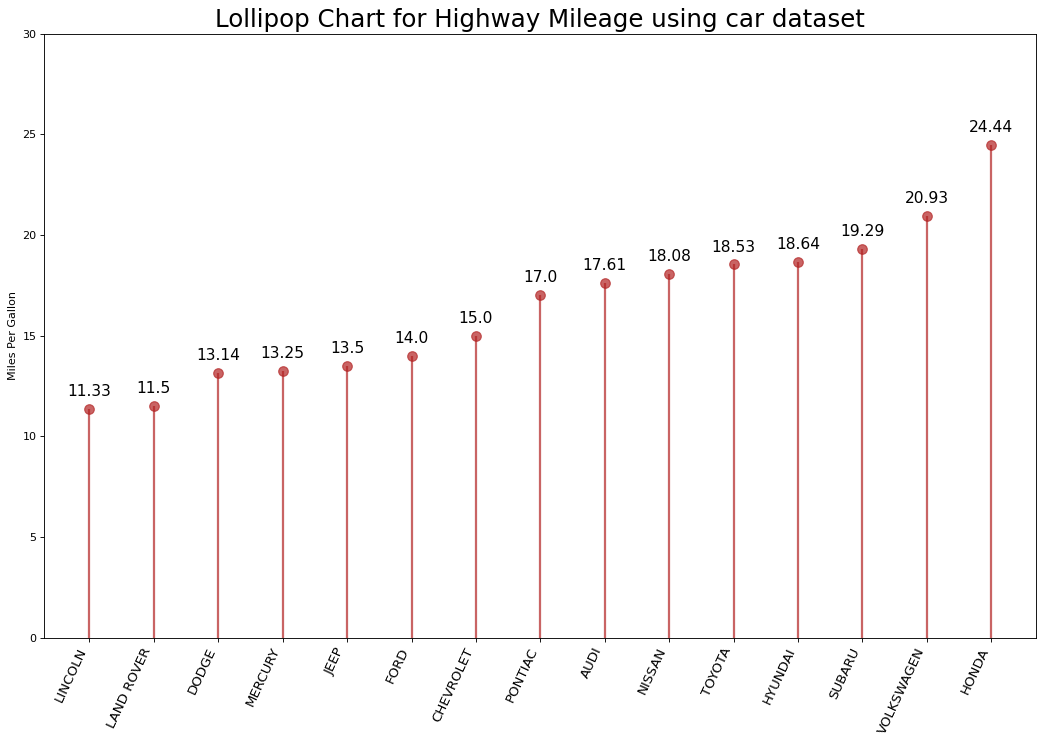

In [53]:


# 4. Plot the graph
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=processedDF.index, ymin=0, ymax=processedDF.cty, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=processedDF.index, y=processedDF.cty, s=75, color='firebrick', alpha=0.7)

# 5. Annotate Title
ax.set_title('Lollipop Chart for Highway Mileage using car dataset', fontdict={'size':22})

# 6. Anotate labels and xticks, ylim
ax.set_ylabel('Miles Per Gallon')
ax.set_xticks(processedDF.index)
ax.set_xticklabels(processedDF.manufacturer.str.upper(), rotation=65, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 30)

# 7. Write the values in the plot
for row in processedDF.itertuples():
    ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

# 8. Display the plot on the screen
plt.show()

#### Company sales

In [54]:
df = pd.read_csv("data/company_sales_data.csv")

In [55]:
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


In [56]:
df.columns

Index(['month_number', 'facecream', 'facewash', 'toothpaste', 'bathingsoap',
       'shampoo', 'moisturizer', 'total_units', 'total_profit'],
      dtype='object')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   month_number  12 non-null     int64
 1   facecream     12 non-null     int64
 2   facewash      12 non-null     int64
 3   toothpaste    12 non-null     int64
 4   bathingsoap   12 non-null     int64
 5   shampoo       12 non-null     int64
 6   moisturizer   12 non-null     int64
 7   total_units   12 non-null     int64
 8   total_profit  12 non-null     int64
dtypes: int64(9)
memory usage: 992.0 bytes


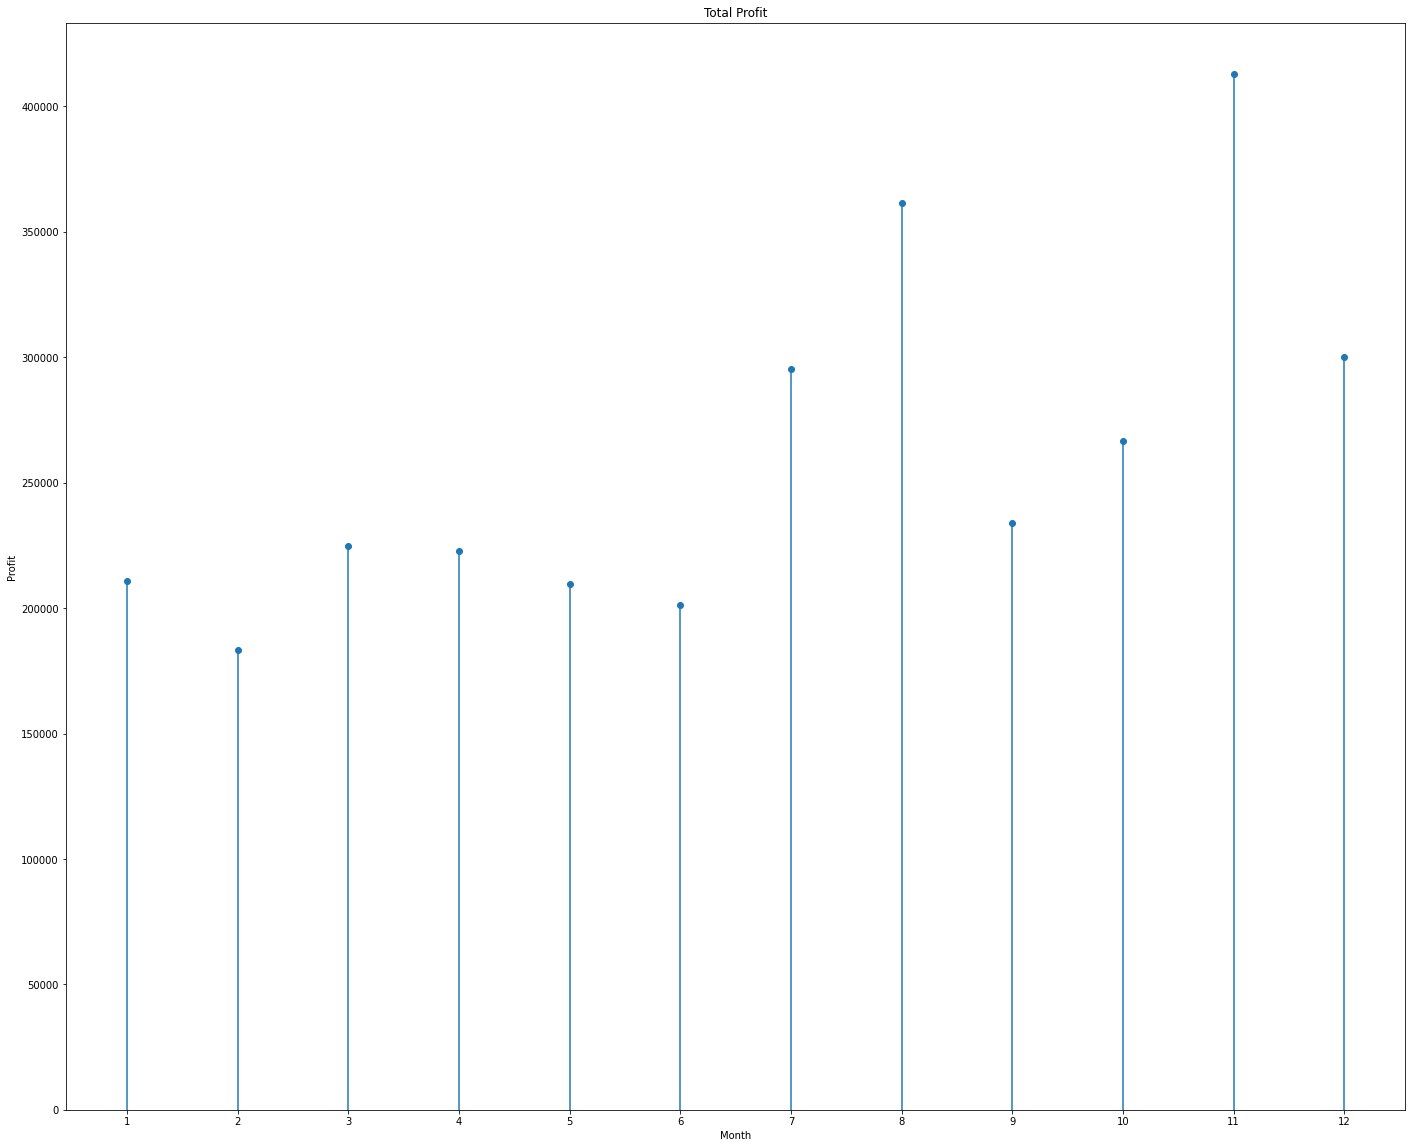

In [58]:

  
# creating an empty chart
fig, axes = plt.subplots()
  
# plotting using plt.stem
axes.stem(df['month_number'], df['total_profit'],
          use_line_collection=True, basefmt=' ')
  
# starting value of y-axis
axes.set_ylim(0)
  
# details and formatting of chart
plt.title('Total Profit')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.xticks(df['month_number'])

 
plt.show()

### Heatmap chart

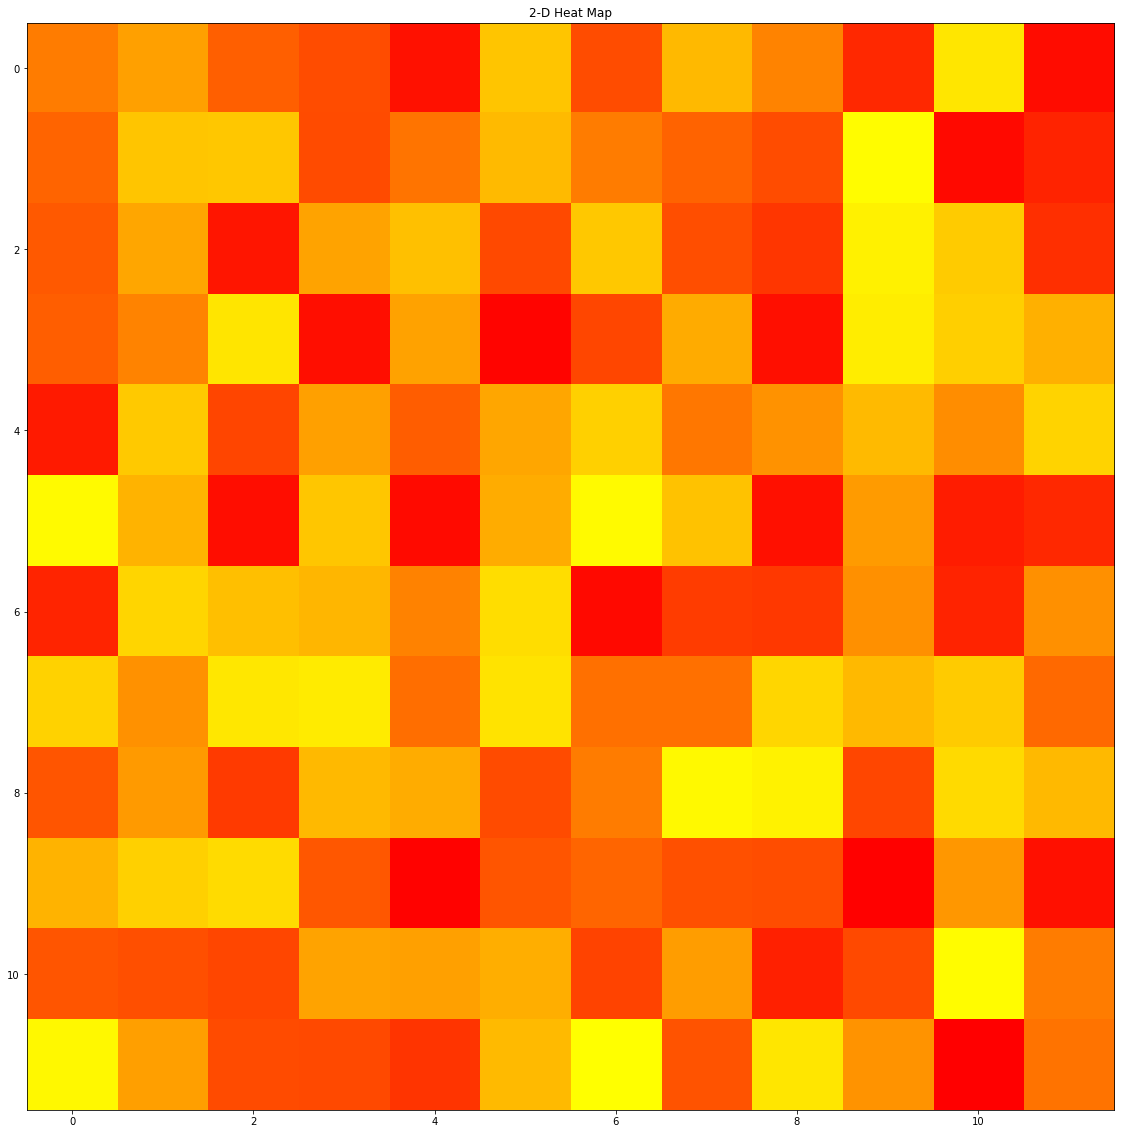

In [59]:
data = np.random.random(( 12 , 12 ))
plt.imshow( data , cmap = 'autumn' , interpolation = 'nearest' )
  
plt.title( "2-D Heat Map" )
plt.show()

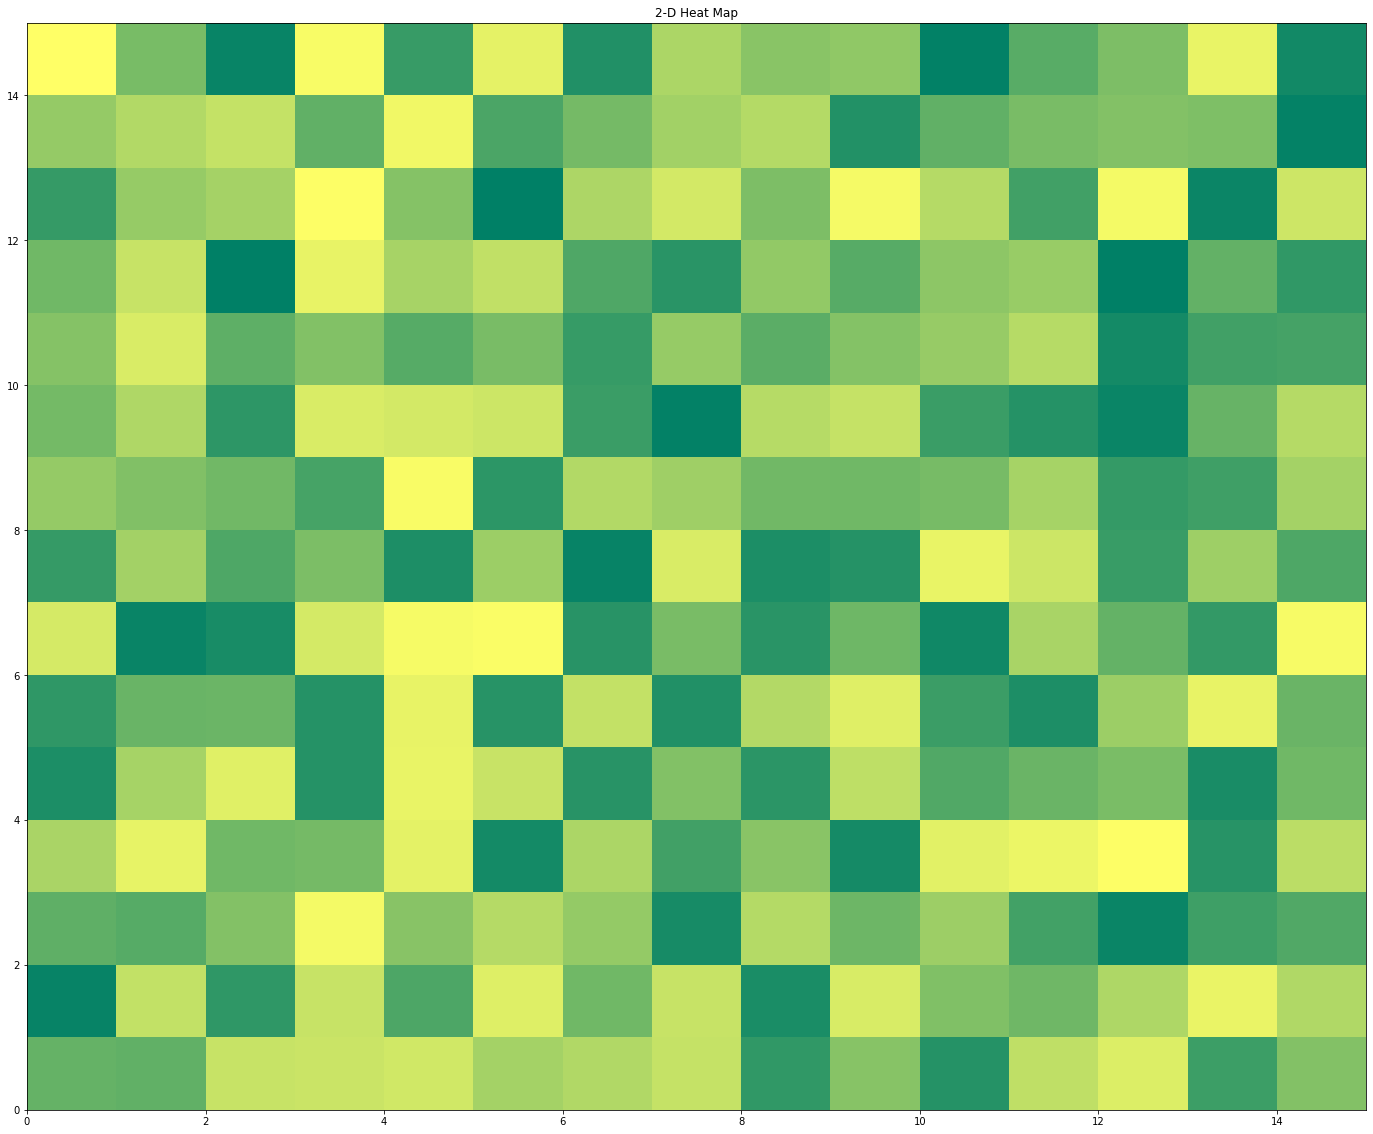

In [60]:
Z = np.random.rand( 15 , 15 )
  
plt.pcolormesh( Z , cmap = 'summer' )
  
plt.title( '2-D Heat Map' )
plt.show()
